<a href="https://colab.research.google.com/github/ShreeKeshavan/Car_price_prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# visualisation modifiers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline


In [163]:
df = pd.read_csv('/content/cars_price.csv')

In [164]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [165]:
# Shape of the data :
df.shape

(205, 26)

In [166]:
# Dataframe information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

From above output we can observe that 16 categorical & 11 numerical Attributes.

All the features are not having correct data-types. So we need to analyse the reason.

All the features are not having correct data-types because of unknown in tha data frame filled with "?" symbol

In [167]:
# Describing the data :
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [168]:
#to check duplicates
df.duplicated().sum()

0

From the above output we can say that there is no duplicate records present in our dataset.

In [169]:
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

There is no zero variance variable

In [170]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

There are no null values currently because the null values are all filled with "?" symbols.

In [171]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [172]:
#to count the '?' or unknown values present in the dataframe 
has_question_mark = df == "?"
columnwise_results = has_question_mark.sum()
columnwise_results

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [173]:
df.drop('normalized-losses',axis=1,inplace=True)

In [174]:
#converting "?" values to null 
df.replace("?", np.nan, inplace=True)

In [175]:
#total null values in the data set
df.isnull().sum().sum()

18

In [176]:
df = df.fillna(method='ffill')

In [177]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

many numerical columns are in obj type lets convert them

In [178]:
print(df.dtypes)

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [179]:
columns_to_convert_int = df[['horsepower','peak-rpm']]
for col in columns_to_convert_int:
    df[col] = df[col].astype(int)

columns_to_convert_float = df[['bore','stroke','price']]
for col in columns_to_convert_float:
    df[col] = df[col].astype(float)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

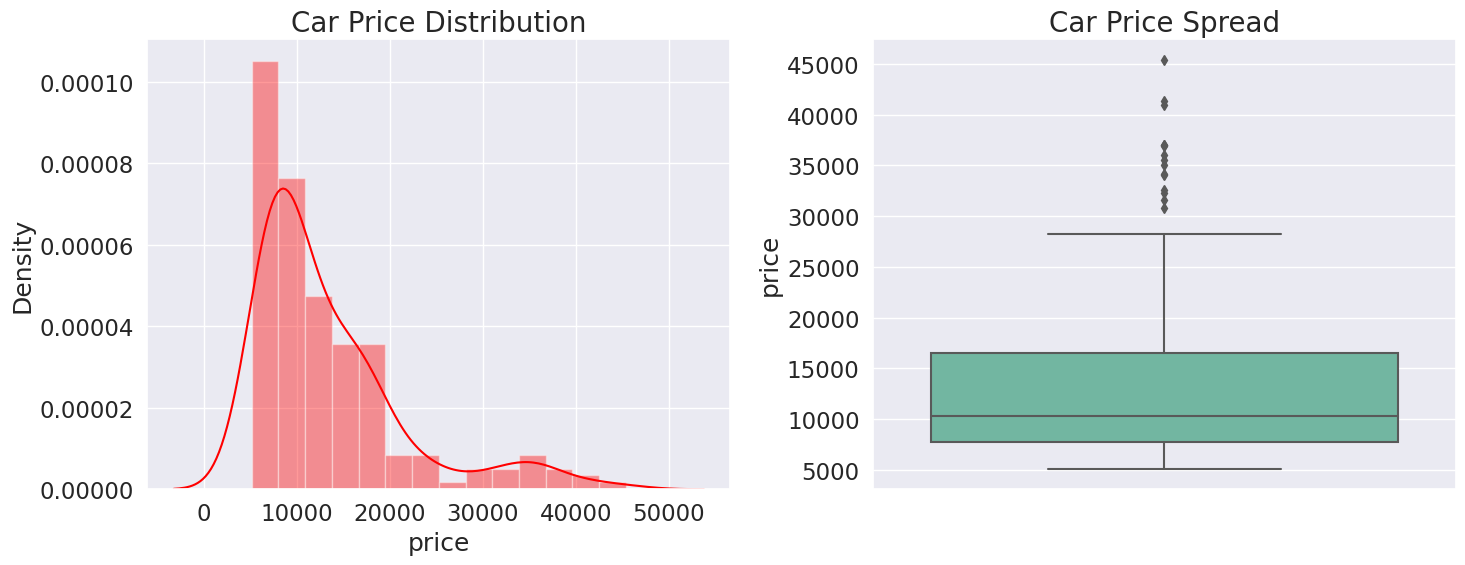

In [181]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontsize=20)
plt.tight_layout() # to adjusts the spacing between subplots
plt.show()

In [182]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame()

,price
min,5118.000000
mean,13312.712195
median,10295.000000
max,45400.000000
std,8102.472461
skew,1.766400


 **Insights**

* We can clearly observe that our Car Price Feature is Right Skewed.
* We can clearly observe that there is a significant difference between mean & median value.
* We can also make an insight that most of the car's price is below 14000.
* We can also that the skewness of the car price is above 1.5 which means that the data points are highly spread.

In [183]:
cat_cols = df.select_dtypes(exclude=[np.number])
cat_cols.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


Visualizing Total No. of cars sold by different company.

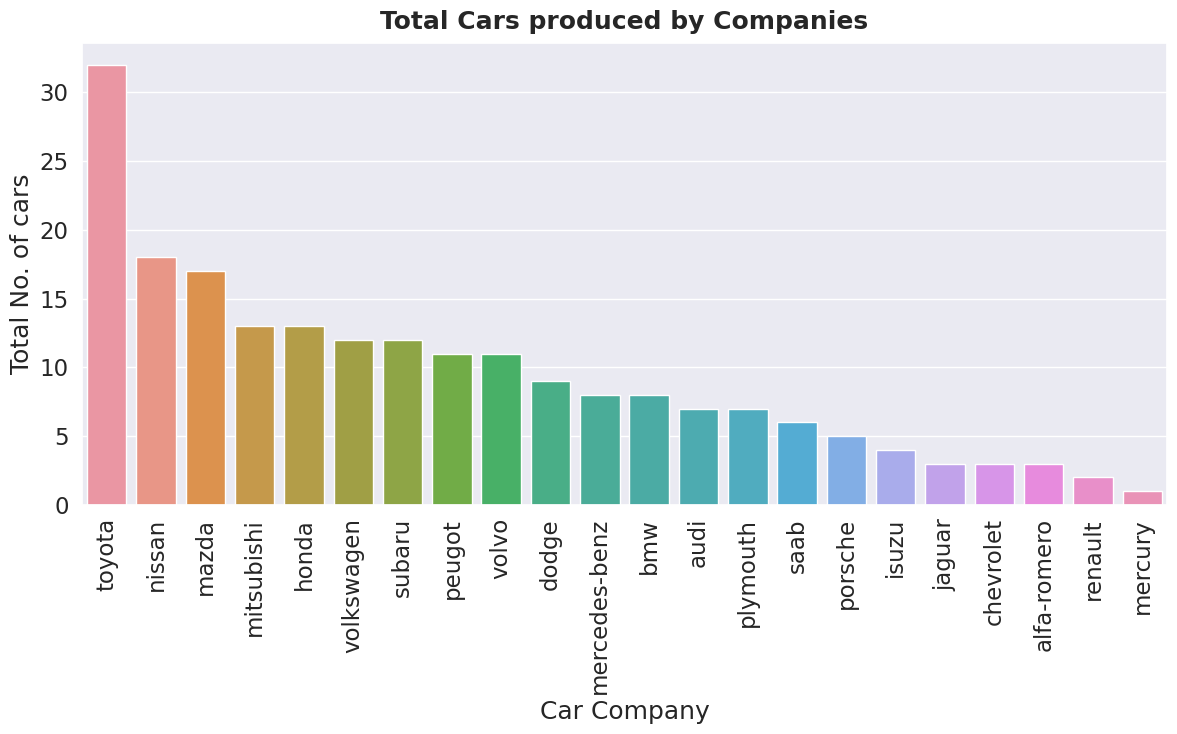

In [184]:
plt.figure(figsize=(14,6))
cars = df["make"].value_counts()
sns.barplot(x=cars.index, y=cars.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars")
plt.title("Total Cars produced by Companies", pad=10, fontweight="black")
plt.xticks(rotation=90)
plt.show()

**Insights**
* Toyota seems to be the most favoured cars.
* Mercury seems to be the least favoured cars.
* So we can say that Toyota is kind of customers most favoured company.
Nisaan ,Mercury or renault are having very low data-points. So we can't make any inference of least sold car companies.

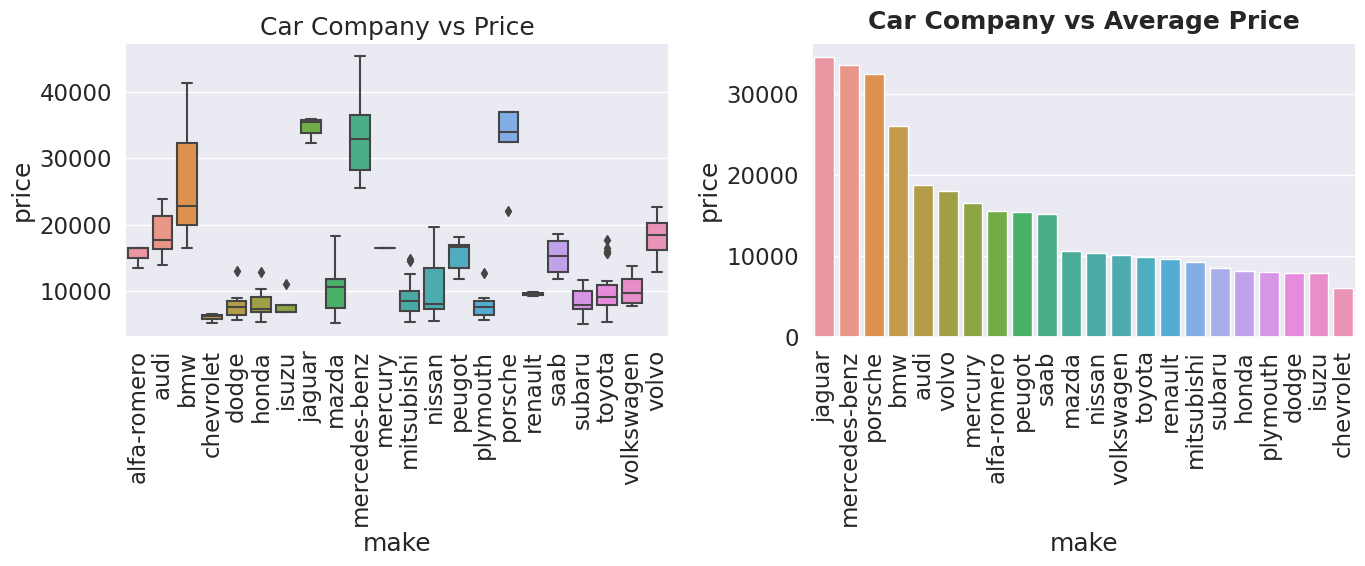

In [185]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='make', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price")

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby('make')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black")

plt.tight_layout()
plt.show()

**Insights**

* Jaguar & mercedes-benz seems to have the highest price range cars.
* Chevrolet seems to have the lowest price range cars.

In [186]:
# Function to visualize categorical features

def Categorical_visualization(col):
  plt.figure(figsize=(20,8))
  plt.subplot(1,3,1)
  sns.countplot( x=col, data=df, palette='Paired', order= df[col].value_counts().index)
  plt.title( f'{col} Distribution', pad= 20, fontweight= 'black', fontsize=20)
  plt.xticks(rotation=90)

  plt.subplot(1,3,2)
  sns.boxplot(x= col, y='price', data=df, palette='Paired')
  plt.title(f'{col} Vs Price', pad=20, fontweight='black', fontsize=20)
  plt.xticks(rotation=90)

  plt.subplot(1,3,3)
  x = pd.DataFrame(df.groupby(col)['price'].mean().sort_values(ascending=False))
  sns.barplot( x= x.index, y= 'price', data=x, palette='Paired')
  plt.title( f'{col} Vs Average price', pad=20, fontweight='black', fontsize=20)
  plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()

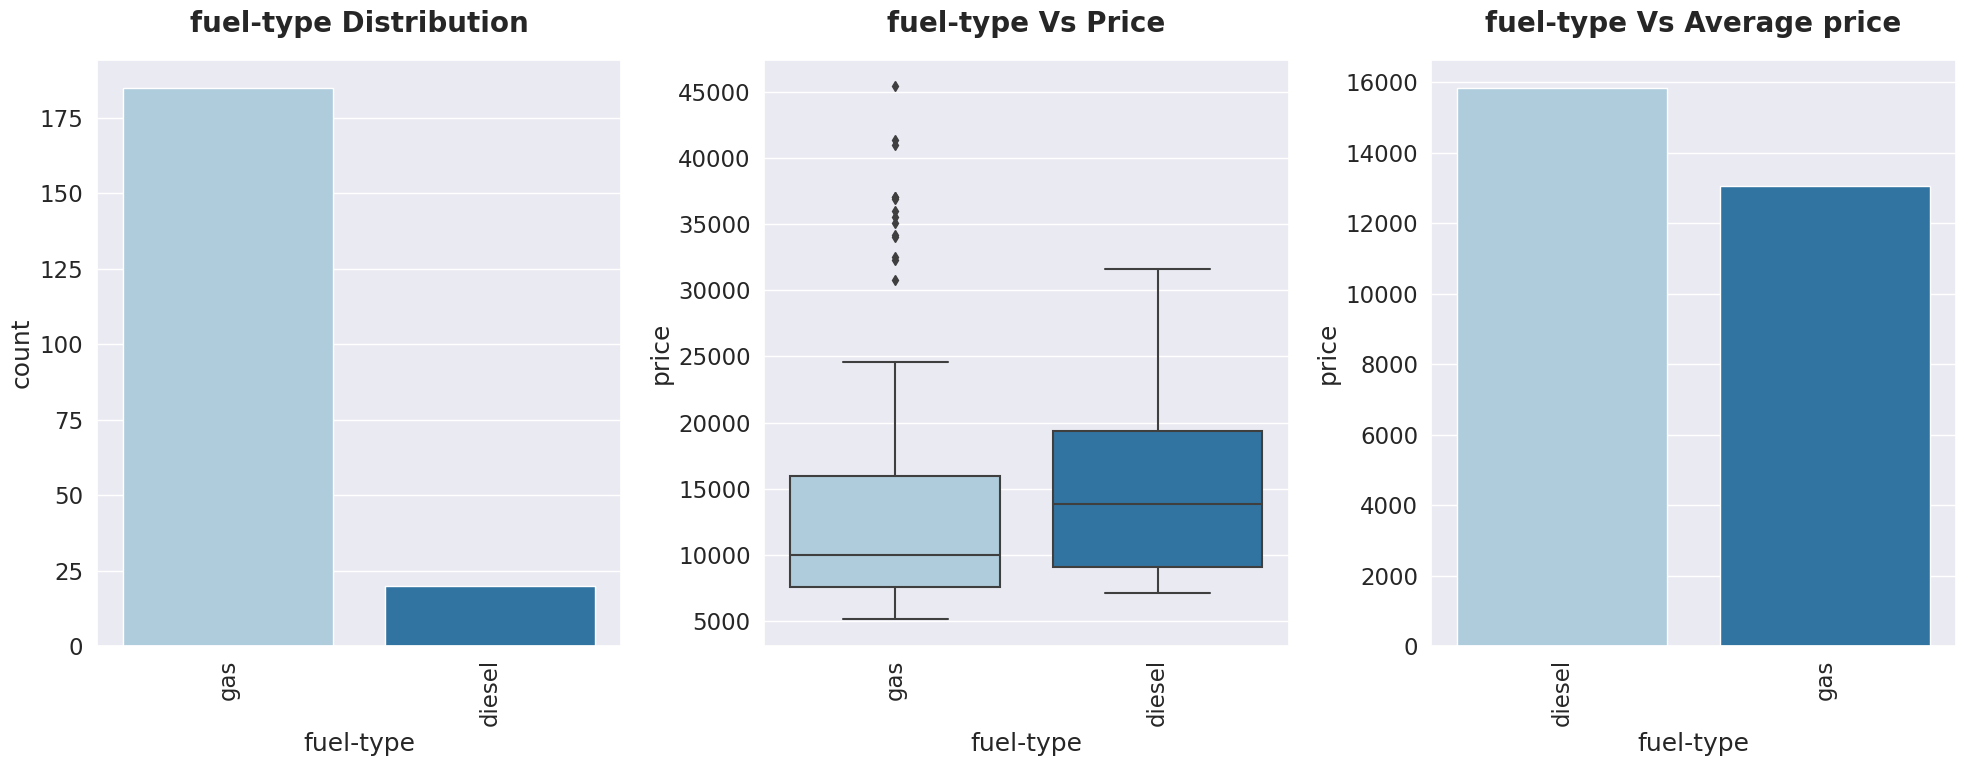

In [187]:
Categorical_visualization('fuel-type')

* We can clearly make an inisght that Cars having gas fuel system is mostly sold.
* From the second plot we can make an insight that Gas Fuel Sysytem cars are availabe within every price range.
* Both type of fuel cars are having most of the cars price near to average price of the cars. But the gas Fuel Type cars are having cars with high prices also.
* From the third plot we can make an inisght that the Average price of gas fuel type cars are less than diesel fuel type cars.

* So we can say that customers prefer those cars which consumes less price in fuels.

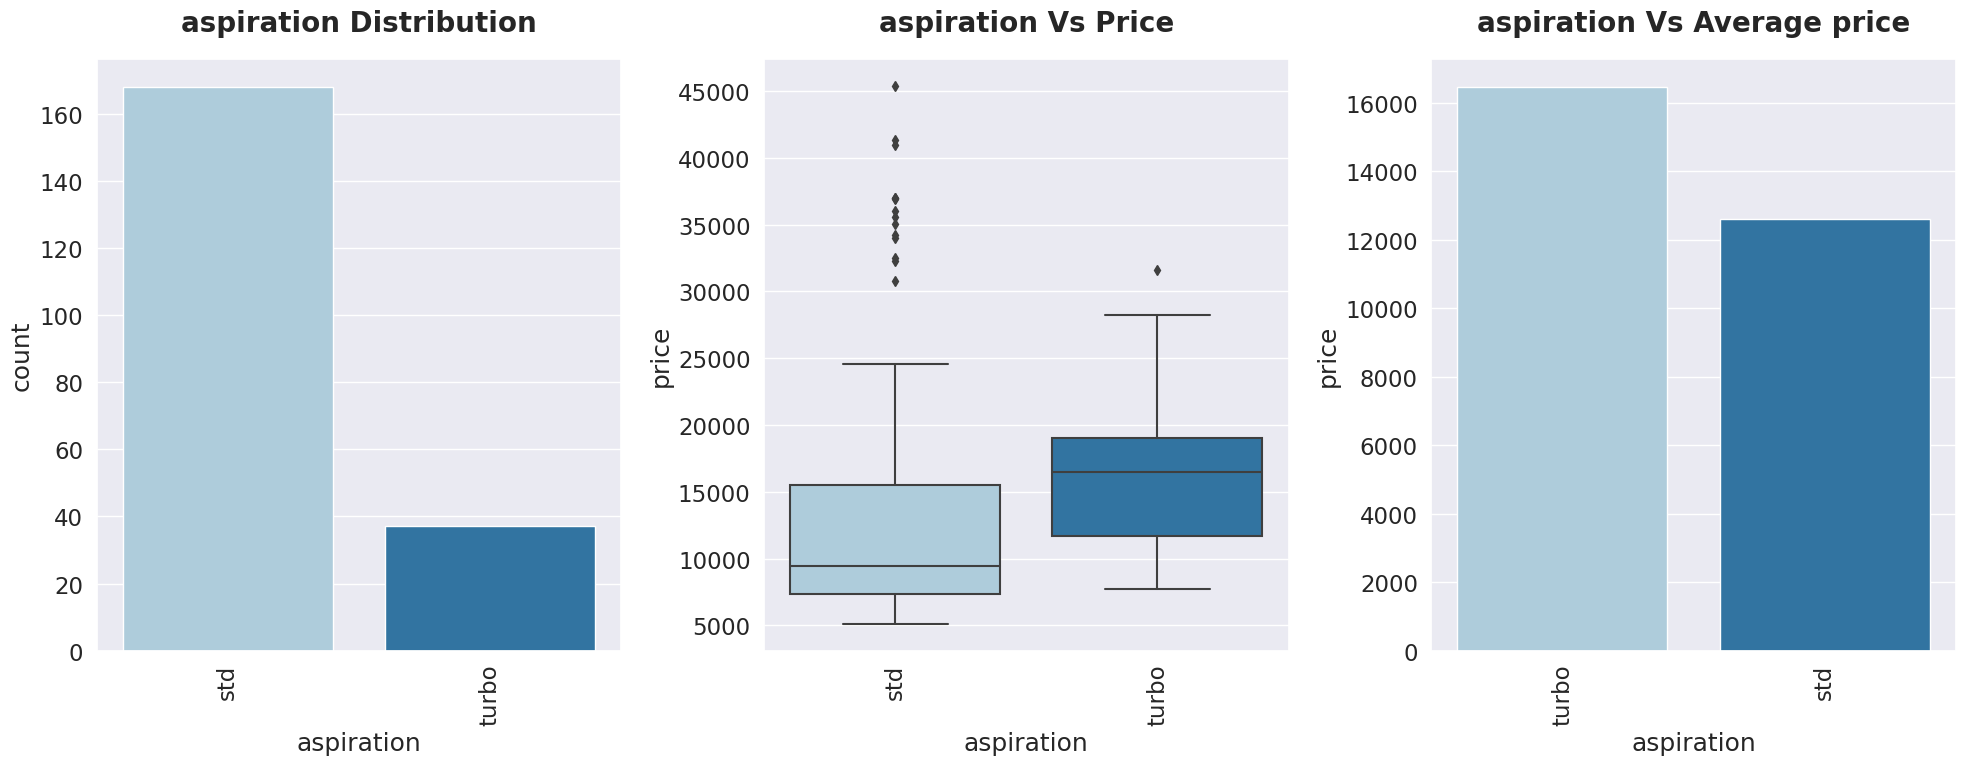

In [188]:
Categorical_visualization('aspiration')

Observation

* Cars having STD Aspiration are highly sold when compared with Turbo Aspiration.
* Cars having Turbo Aspiration have higher price range than the STD Aspiration.

Insights

* Outliers present in STD Aspiration states that some of the cars having std aspiration are expensive too.

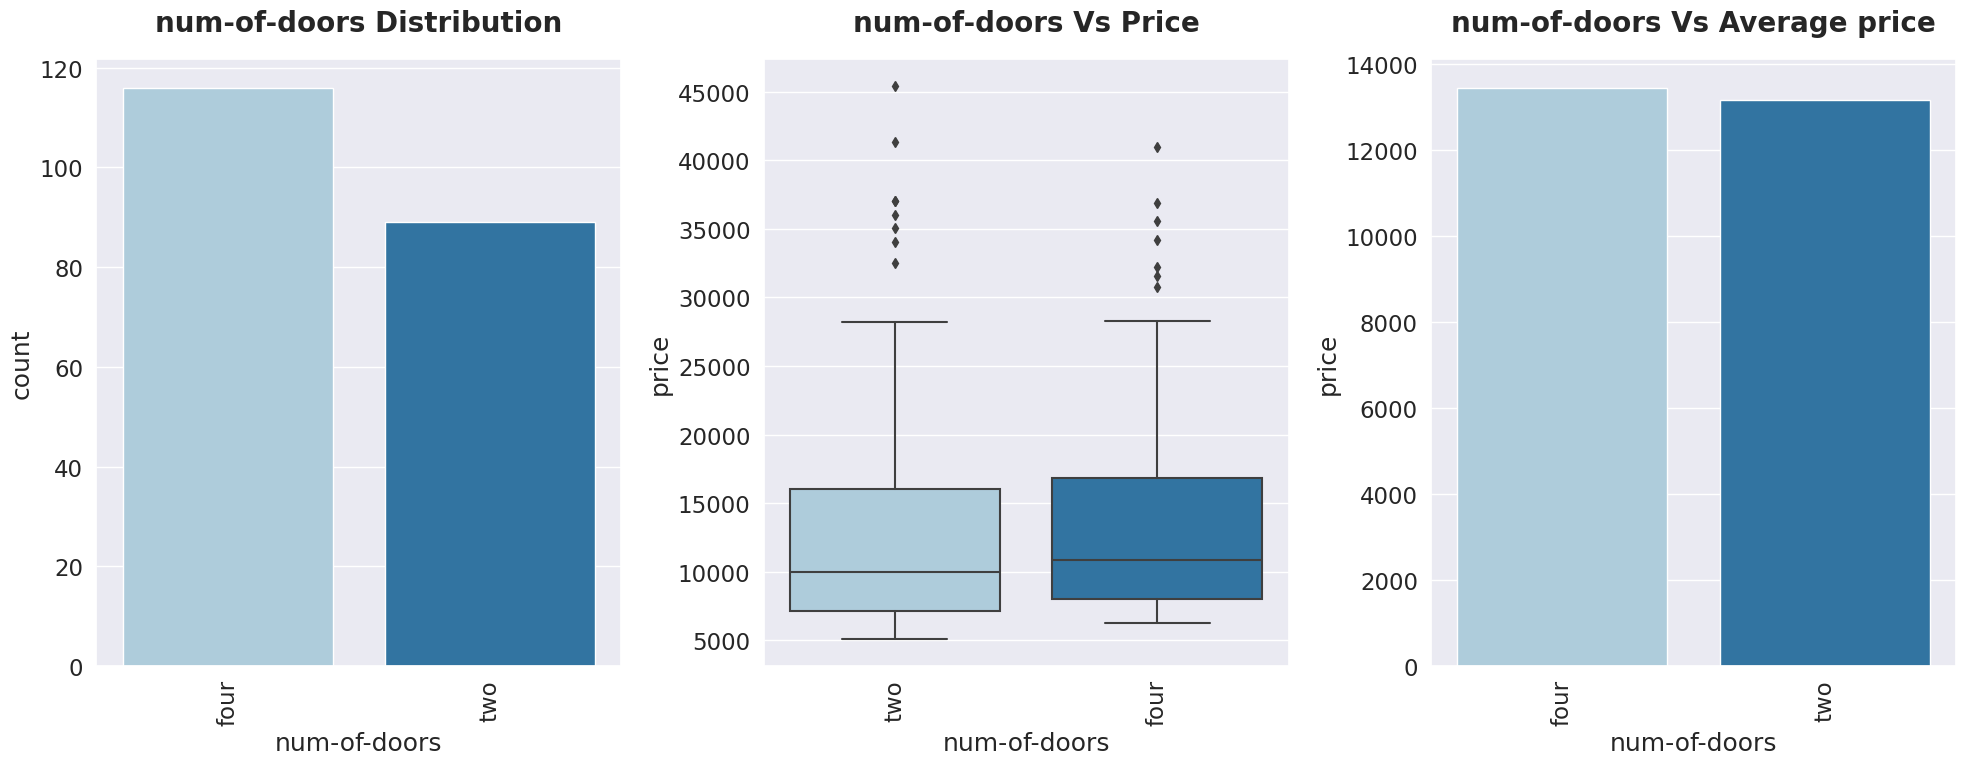

In [189]:
Categorical_visualization('num-of-doors')

Observation

* Cars having Four Doors are mostly sold when compared with cars having Two Doors.
* Cars having Fours Doors are little more expensive when we compare the avergae price of cars having two doors or four doors.

Insights

* Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors..

* Outliers prsesent in two doors cars states that some of the cars are are more expensive than the cars having four doors

* Door numbers category is not affecting the price that much.

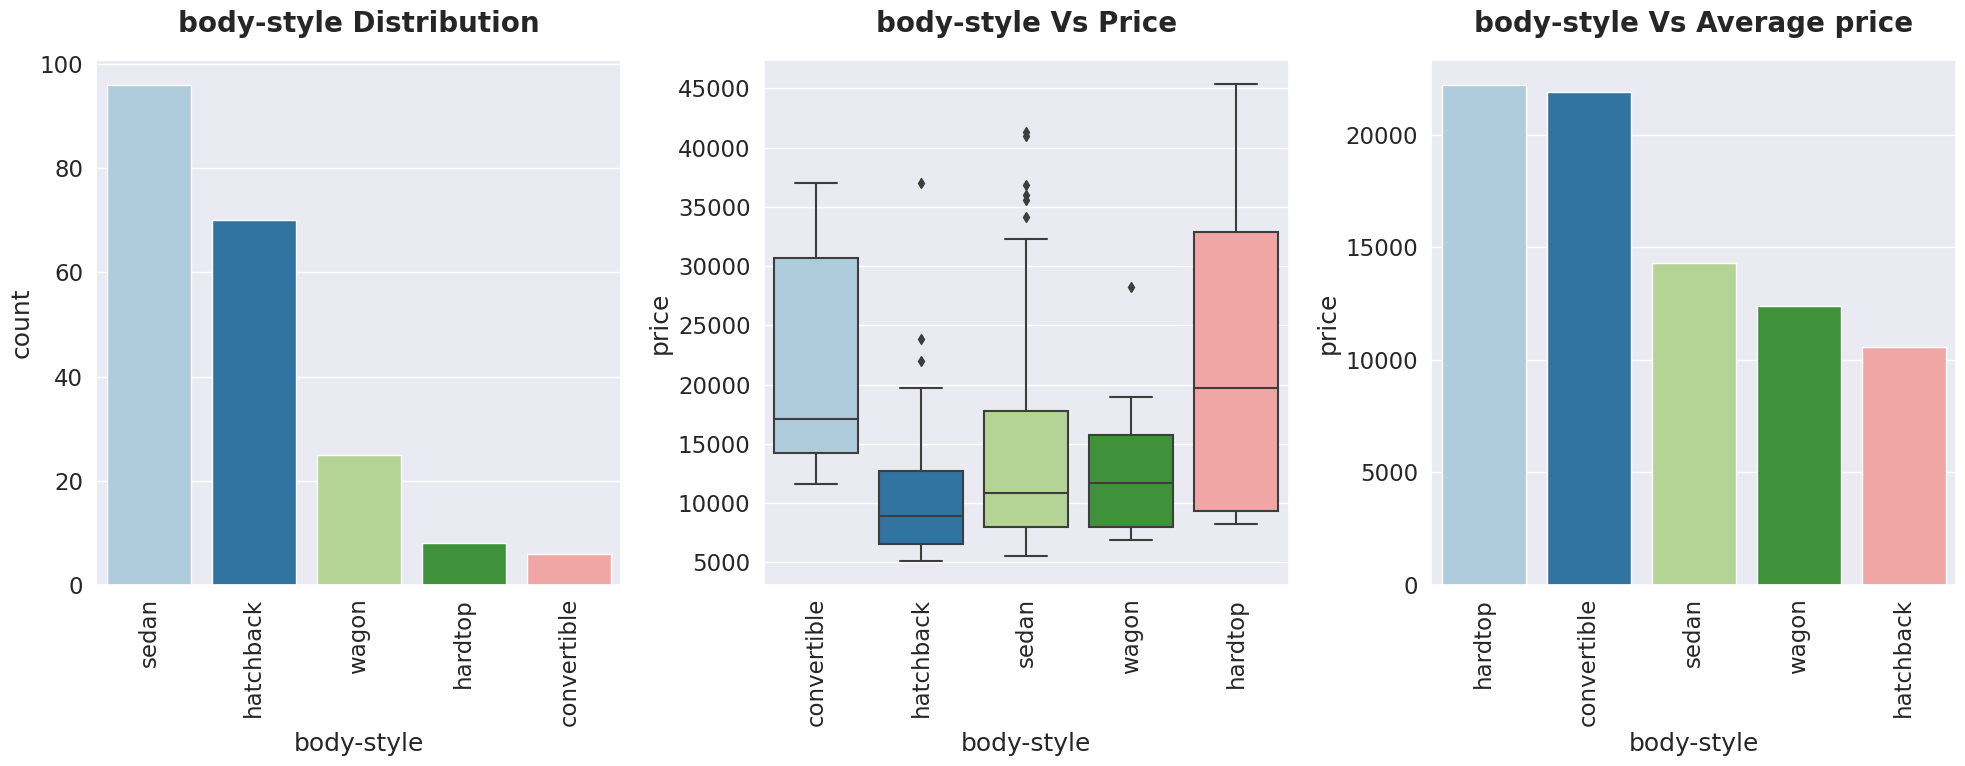

In [190]:
Categorical_visualization('body-style')

Obseravtion

* Cars having sedan body-type are mostly sold followed by hatchback.
* Cars having convertible or hardtop body-type are less sold.
* Cars having Hardtop body-type is the mostly expensive cars followed by convertible.

Insights

* Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.
* Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.

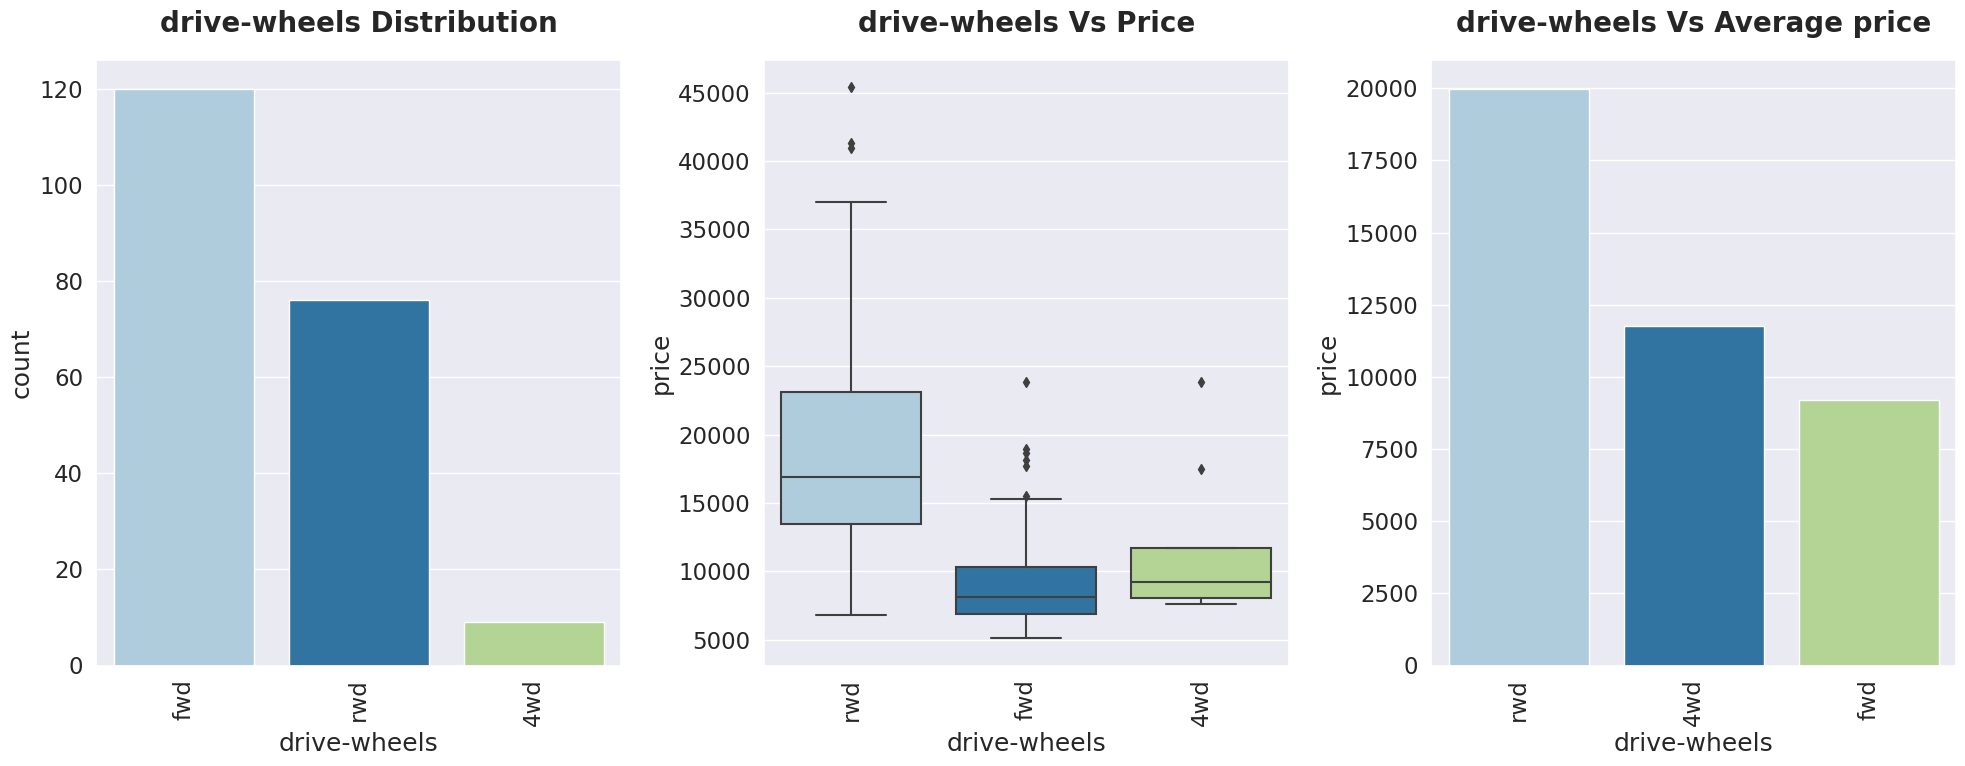

In [191]:
Categorical_visualization('drive-wheels')

Observation

*  Most of the cars which are sold are having Front Wheel Drive (FWD) followed by Rear Wheel Drive (RWD).
* Cars having Rear Wheel Drive are mostly expensive cars. But cars having Front Wheel Drive are the cheapest.

Insights

* We can make an insight that the high rated cars must be using Rear Wheel Drive.
* Cars with low prices must be using Forward Wheel Drive

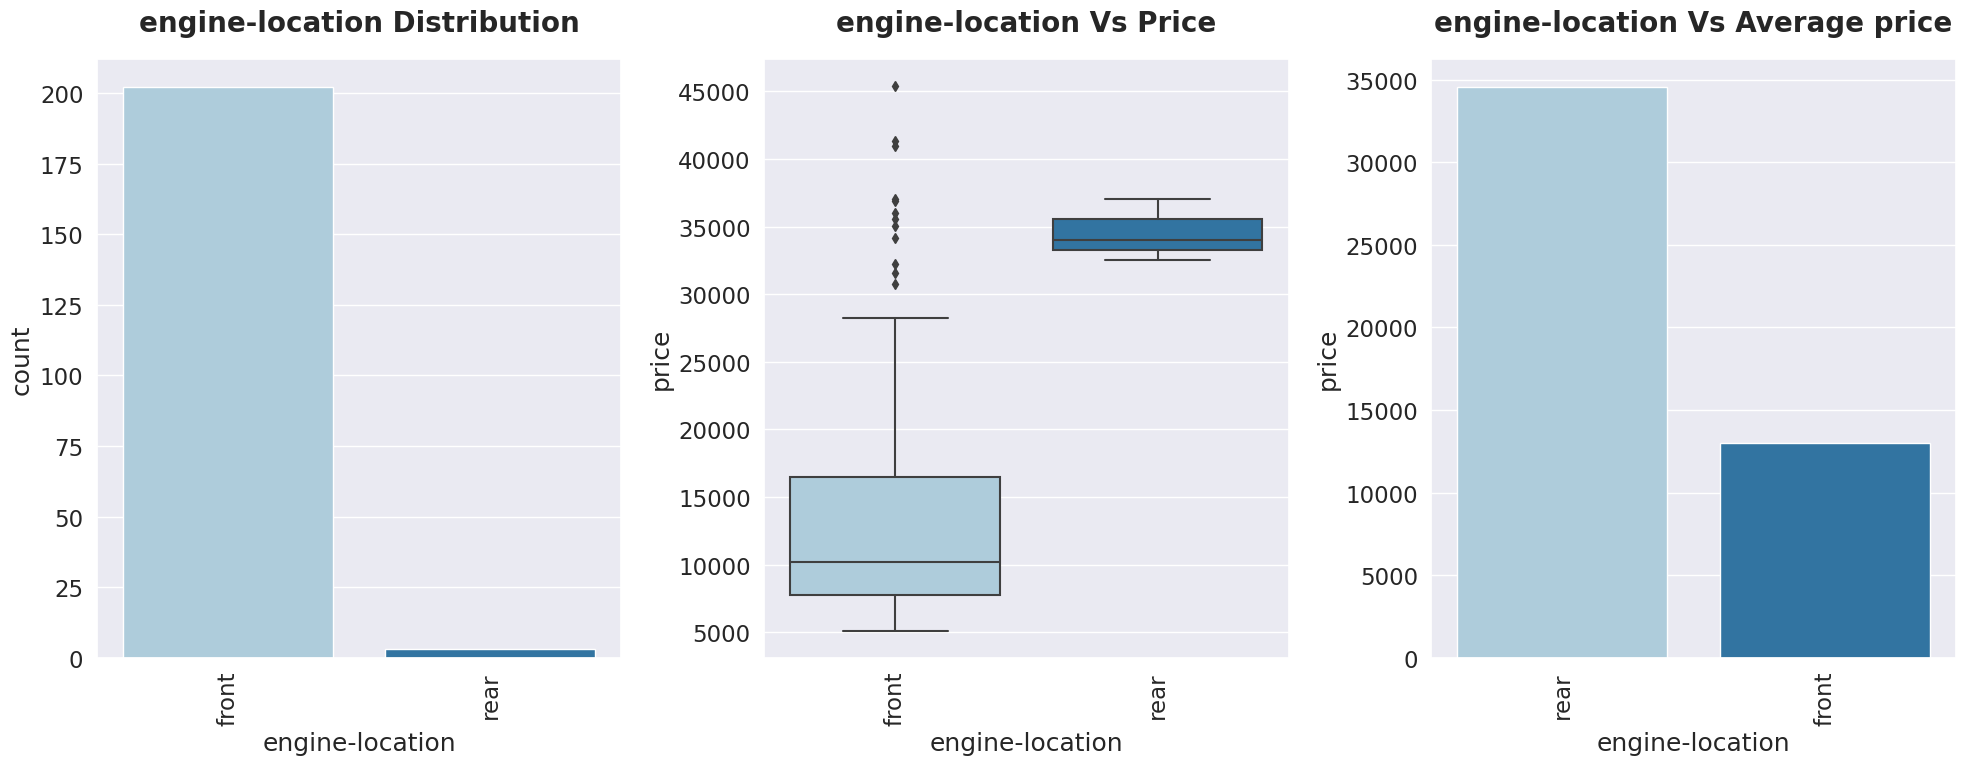

In [192]:
Categorical_visualization('engine-location')

In [193]:
df[df["engine-location"]=="rear"]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


Observation

* Most of the cars are having engine location in front.

Insights

* Note there are only 3 data-points for the rear category.
* So we can't make any inference of car price when compared with engine location.
* If we want we can drop this feature before training as it may lead to overfitting.

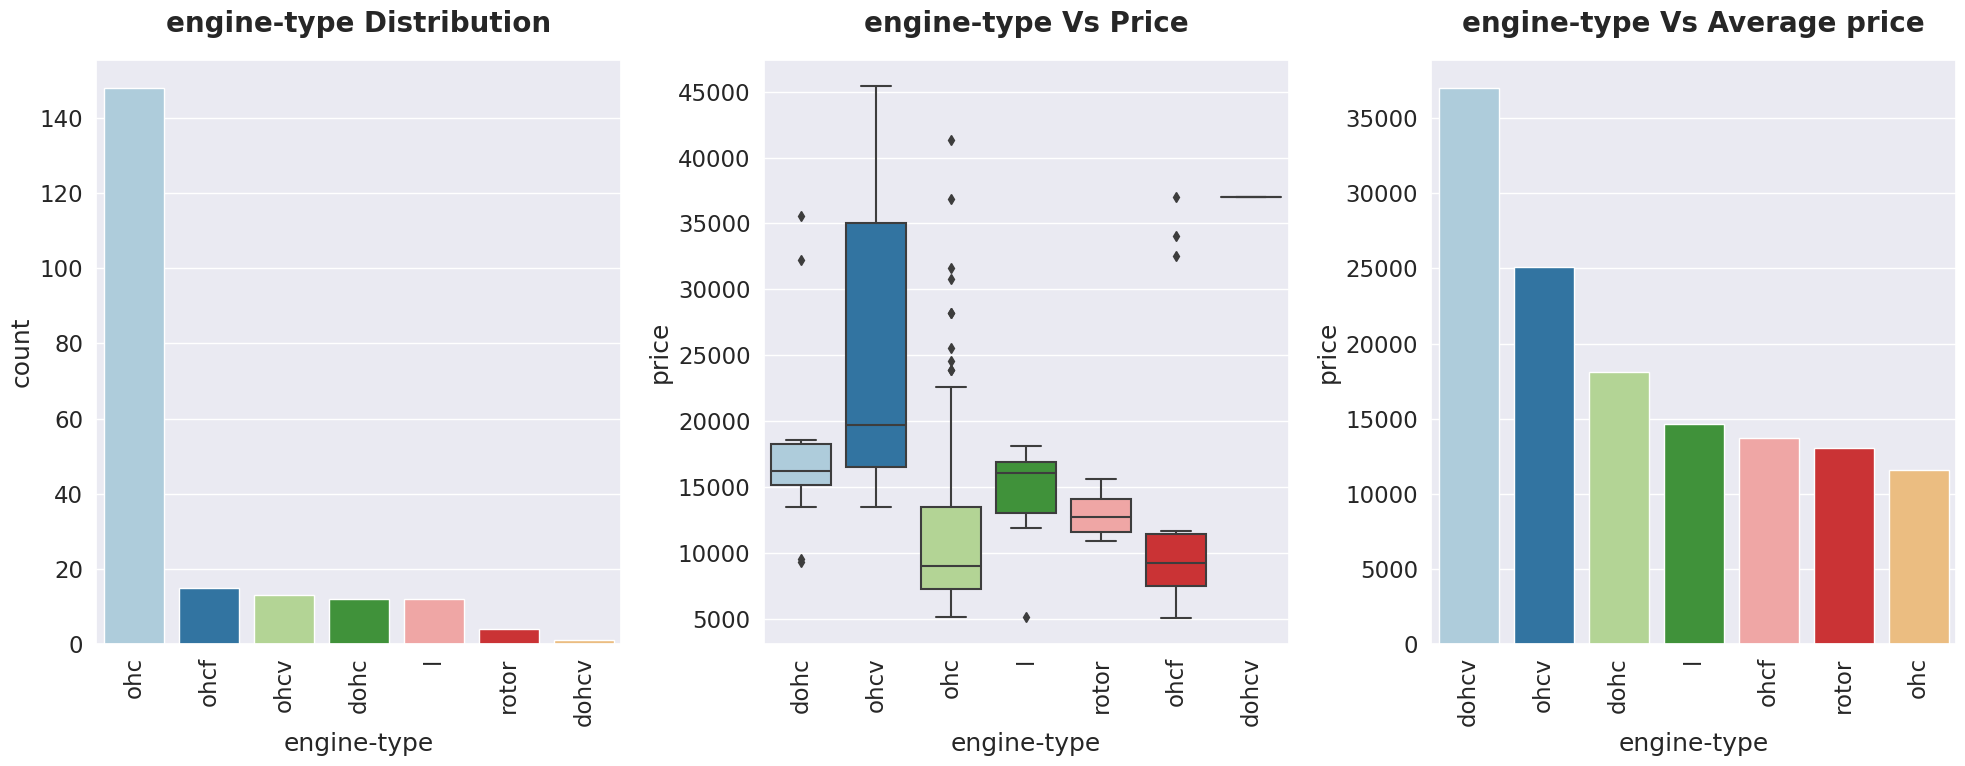

In [194]:
Categorical_visualization('engine-type')

In [195]:
df[df["engine-type"]=="dohcv"]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
129,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,37028.0


Insights

* Cars having Overhead Camshaft (OHC) engines are mostly sold.
* Only one car has been sold having engine type dohcv.
* There are very few data-points of engine type dohcv & rotor. So we can say that cars having ohcv engine types are mostly expensive.
* Cars hvaing Overhead Camshaft (OHC) engines are least expensive cars.

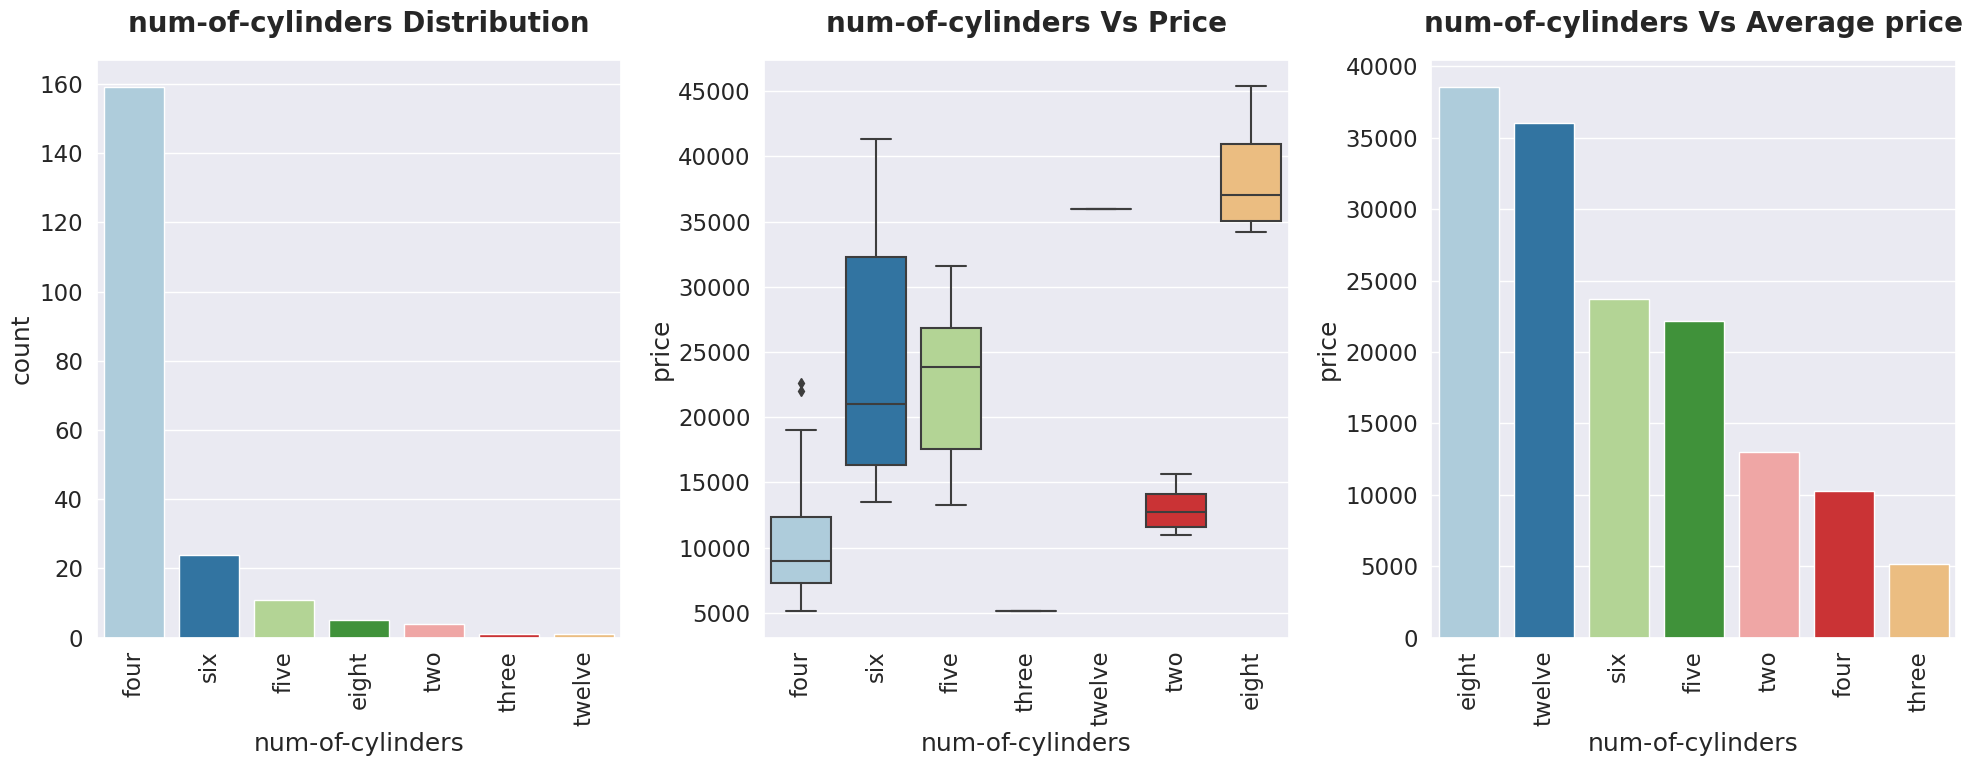

In [196]:
Categorical_visualization('num-of-cylinders')

In [197]:
df[df['num-of-cylinders'] == 'three']

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0


In [198]:
df[df['num-of-cylinders'] == 'twelve']

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


Insights

* Most of the cars are having Four cyclinders followed by cars having six cyclinders.
* There are only one data-point each for car having Three & Twelve data-points.
Cars having eight cyclinders are most expensive cars followed by six cyclinders.

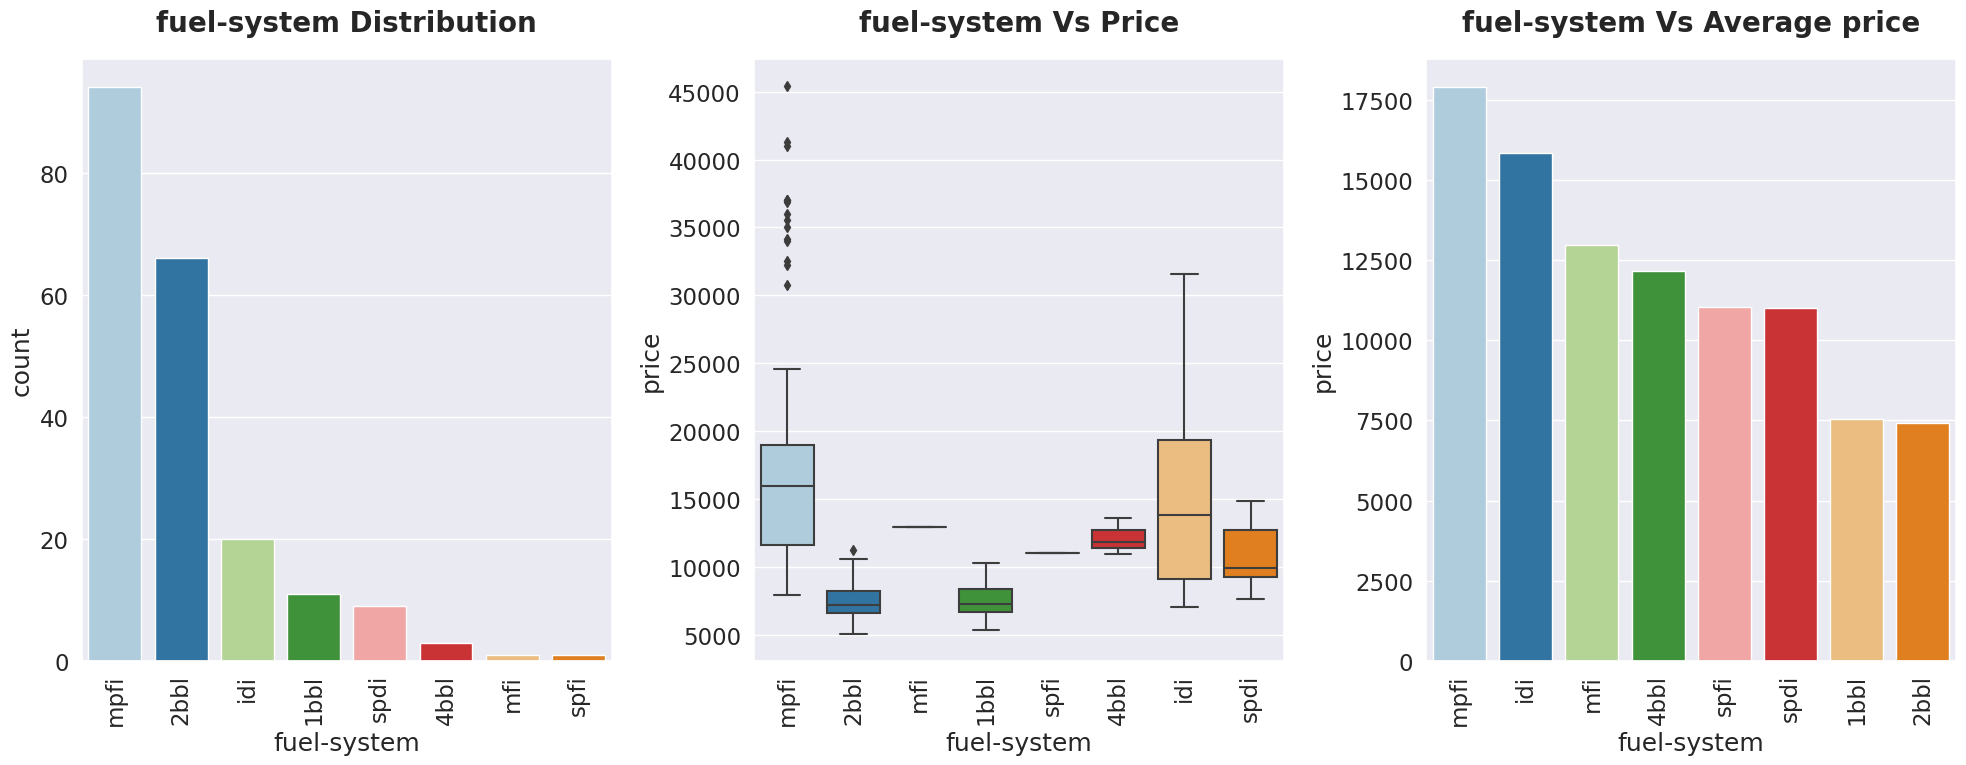

In [199]:
Categorical_visualization('fuel-system')

In [200]:
df[df["fuel-system"]=="mfi"]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
29,3,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0


In [201]:
df[df["fuel-system"]=="spfi"]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
46,2,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


Insight

* Most of the cars are having mpfi & 2bbl fuelsystems.
* Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.
* There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference.

* The symboling represents the degree to which the car is riskier than its price suggests.
* It ranges from -3 to +3, with higher negative values indicating higher risk and higher positive values indicating lower risk.
* In other words, a car with a symboling of -3 is considered riskier than a car with a symboling of +3, and is likely to have a lower price as a result.

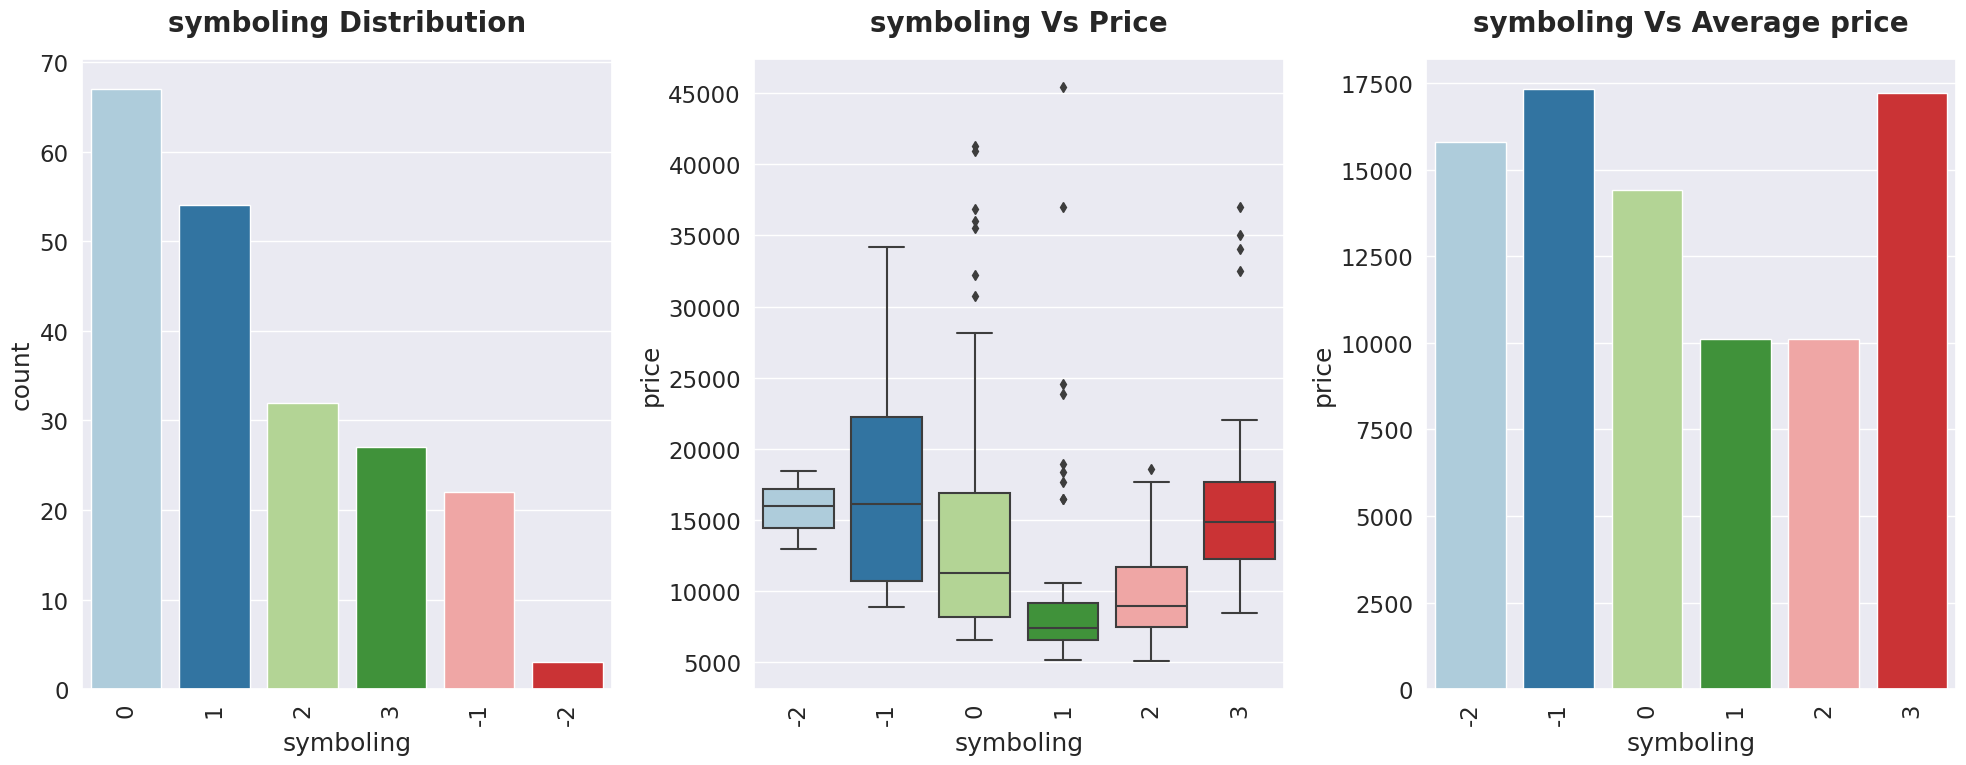

In [202]:
Categorical_visualization('symboling')

Insights

* We can clearly observe cars having symboling 0 or 1 are motly preferred.
* We can aslo observe that symboling -1, 0, 3 are expensive.

Numerical Features

In [203]:
num_cols = df.select_dtypes(include =[np.number])
num_cols.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [204]:
# plt.figure(figsize = (30,30))
# sns.pairplot(num_cols)
# plt.show()

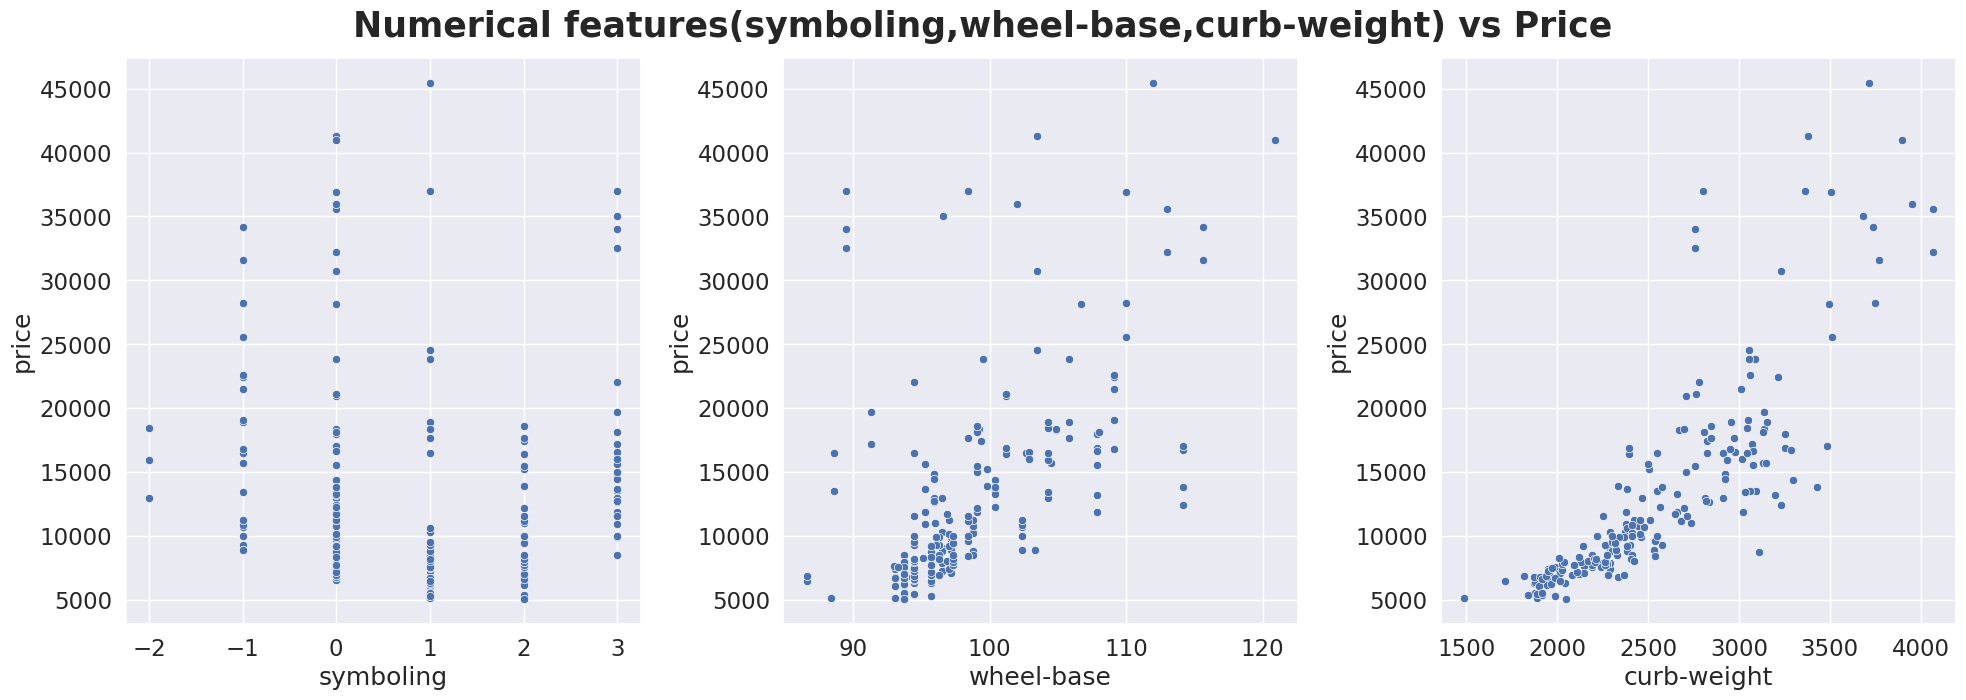

In [205]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.scatterplot(x='symboling', y='price', data=df)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.scatterplot(x='wheel-base', y='price', data=df)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.scatterplot(x='curb-weight', y='price', data=df)

plt.suptitle('Numerical features(symboling,wheel-base,curb-weight) vs Price', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


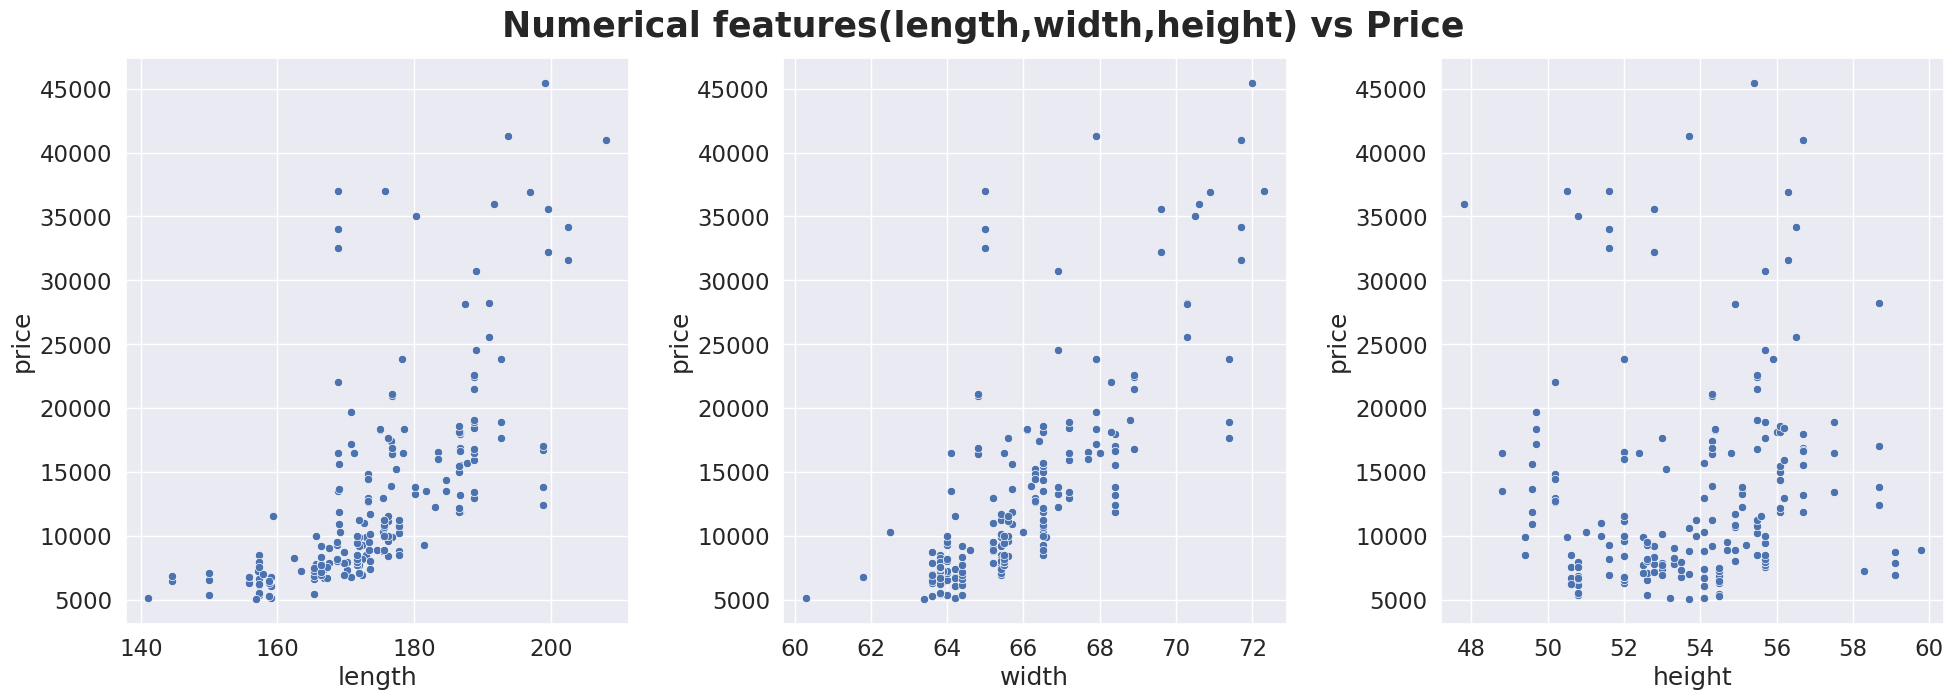

In [206]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.scatterplot(x='length', y='price', data=df)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.scatterplot(x='width', y='price', data=df)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.scatterplot(x='height', y='price', data=df)

plt.suptitle('Numerical features(length,width,height) vs Price', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


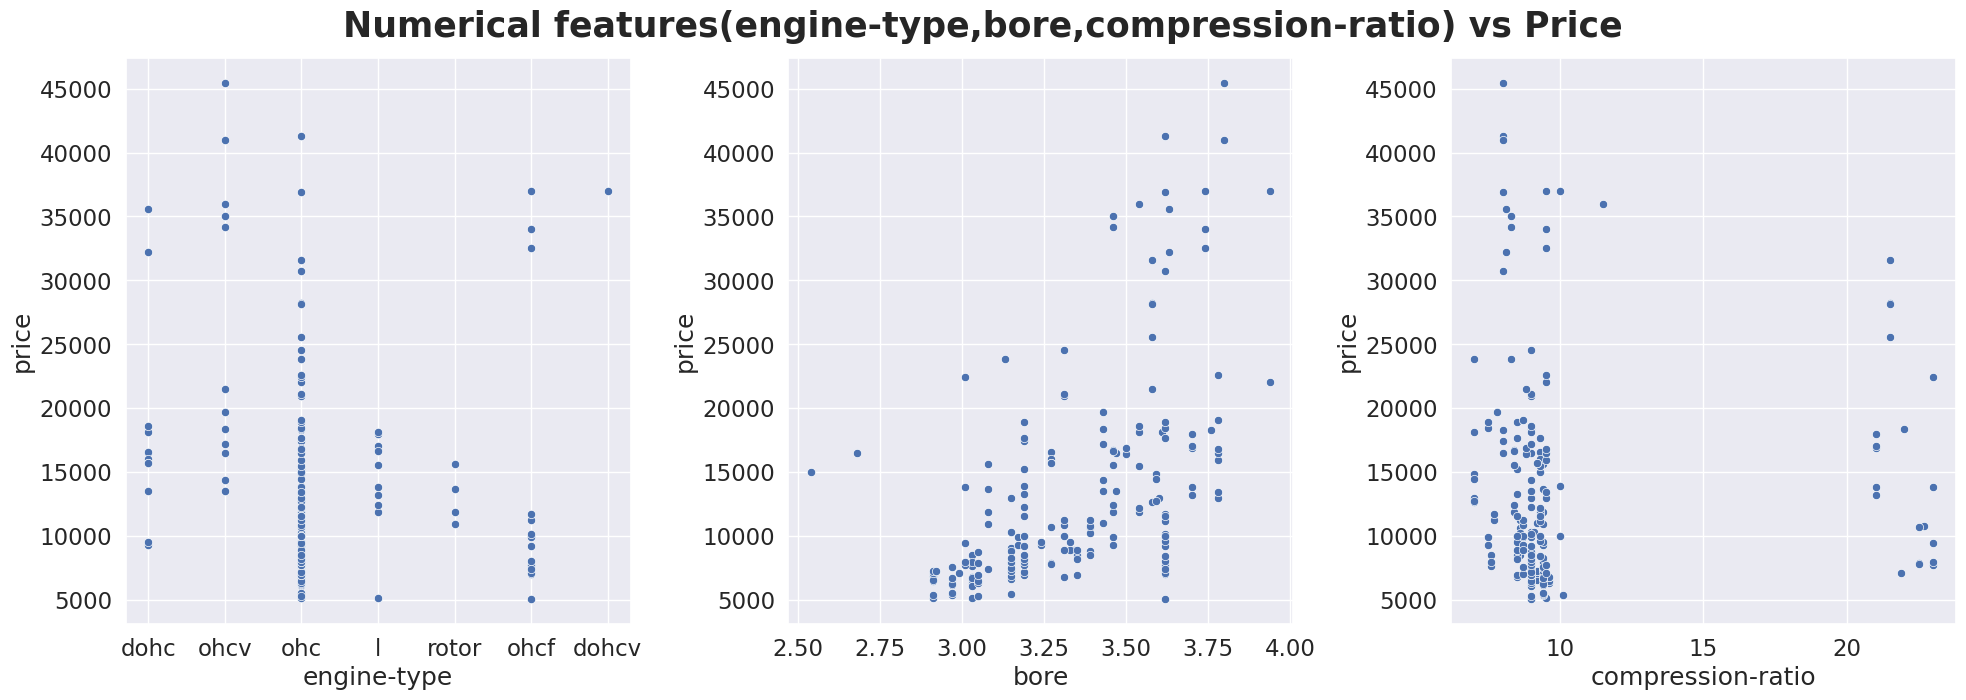

In [207]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.scatterplot(x='engine-type', y='price', data=df)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.scatterplot(x='bore', y='price', data=df)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.scatterplot(x='compression-ratio', y='price', data=df)

plt.suptitle('Numerical features(engine-type,bore,compression-ratio) vs Price', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


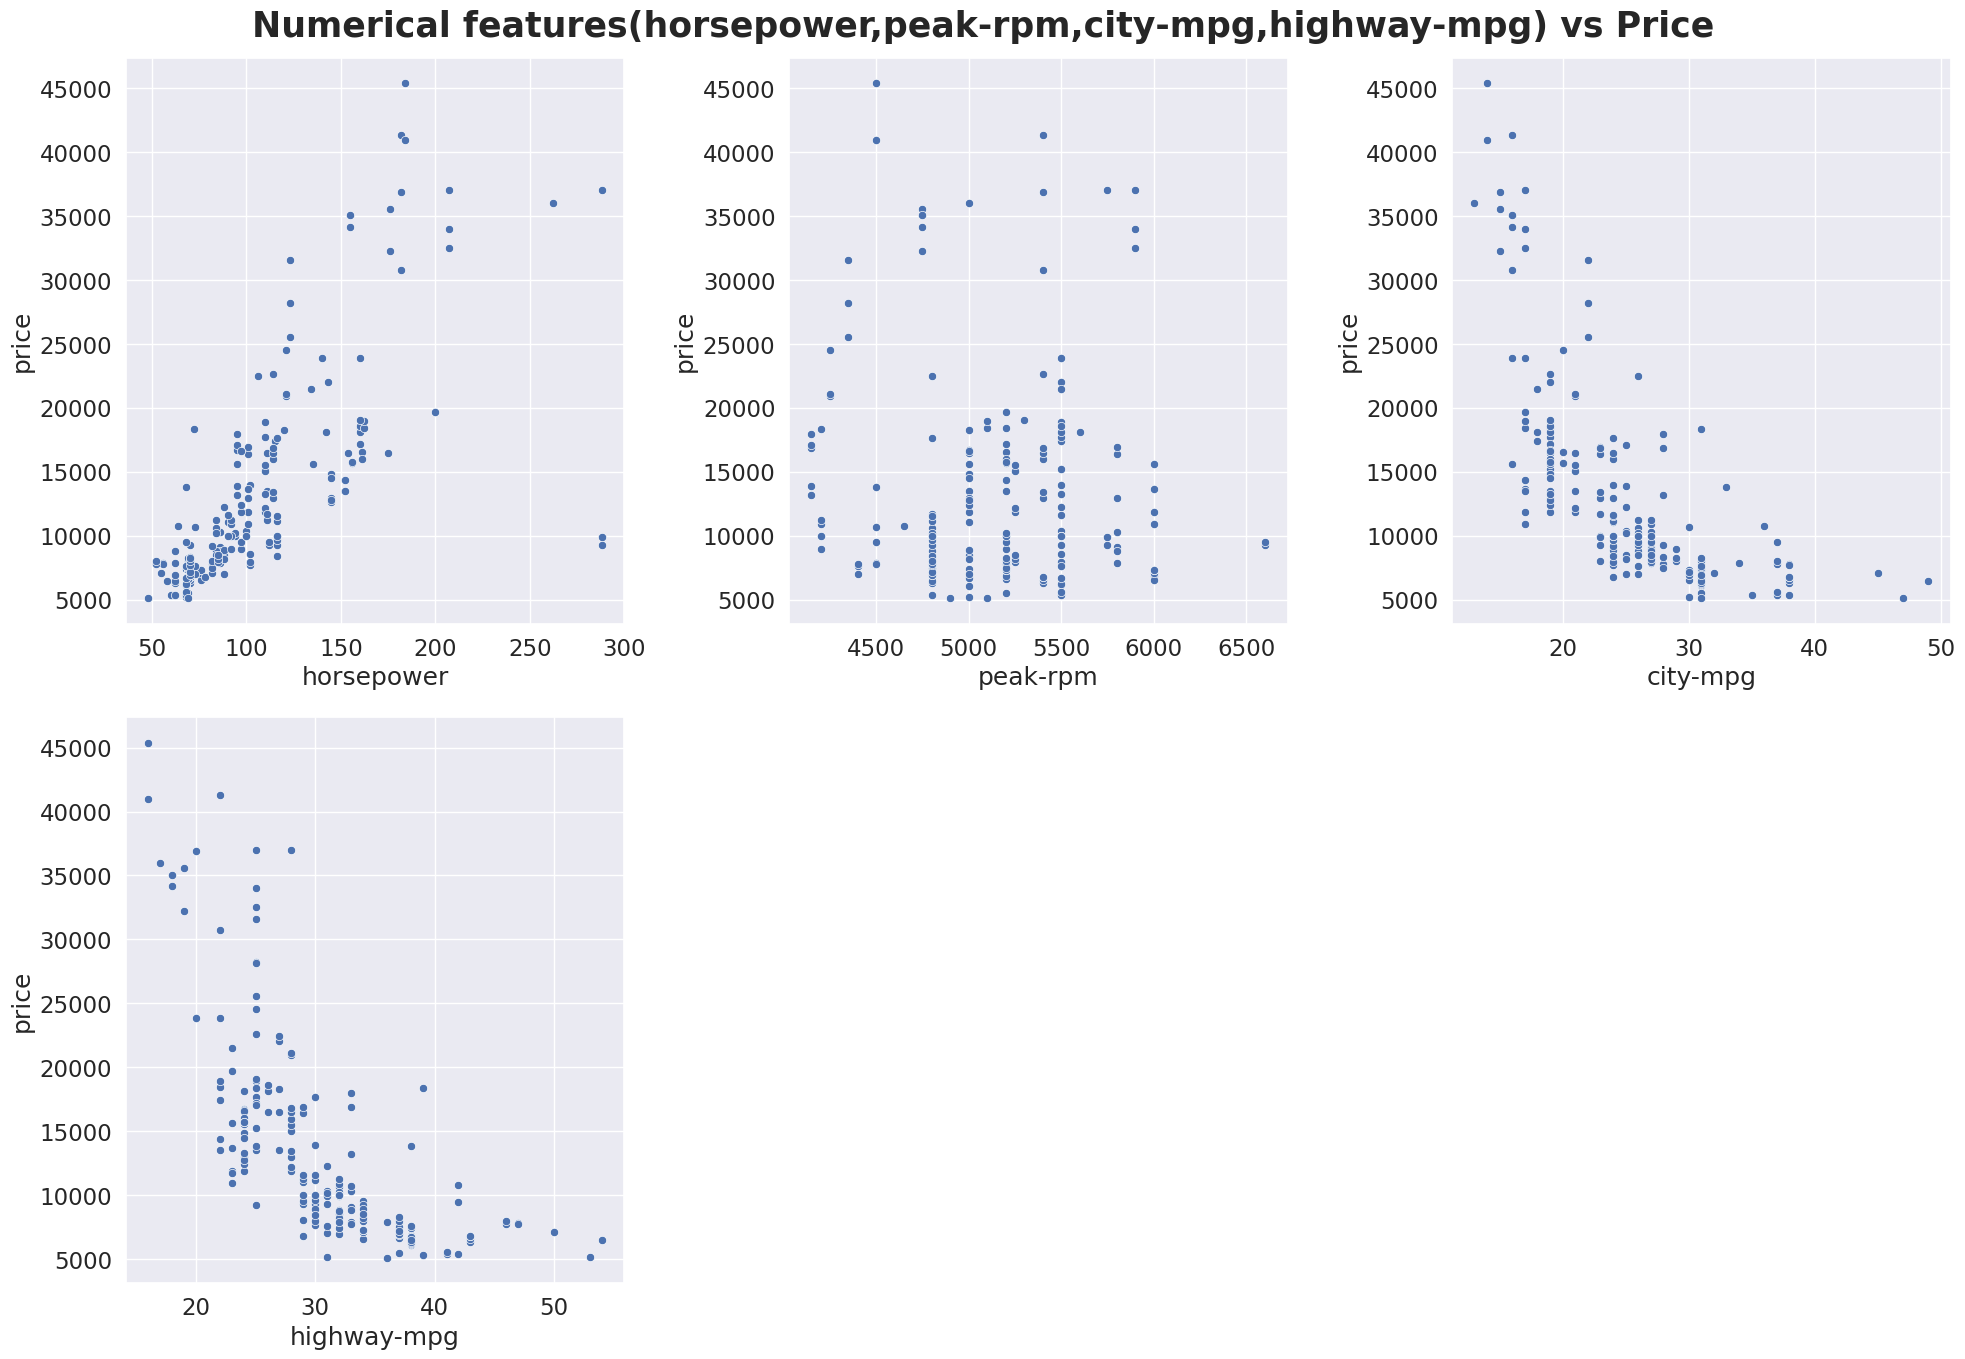

In [208]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.scatterplot(x='horsepower', y='price', data=df)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.scatterplot(x='peak-rpm', y='price', data=df)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.scatterplot(x='city-mpg', y='price', data=df)

plt.subplot(3, 3, 4) # 3 rows, 3 columns, 4th subplot = left
sns.scatterplot(x='highway-mpg', y='price', data=df)

plt.suptitle('Numerical features(horsepower,peak-rpm,city-mpg,highway-mpg) vs Price', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


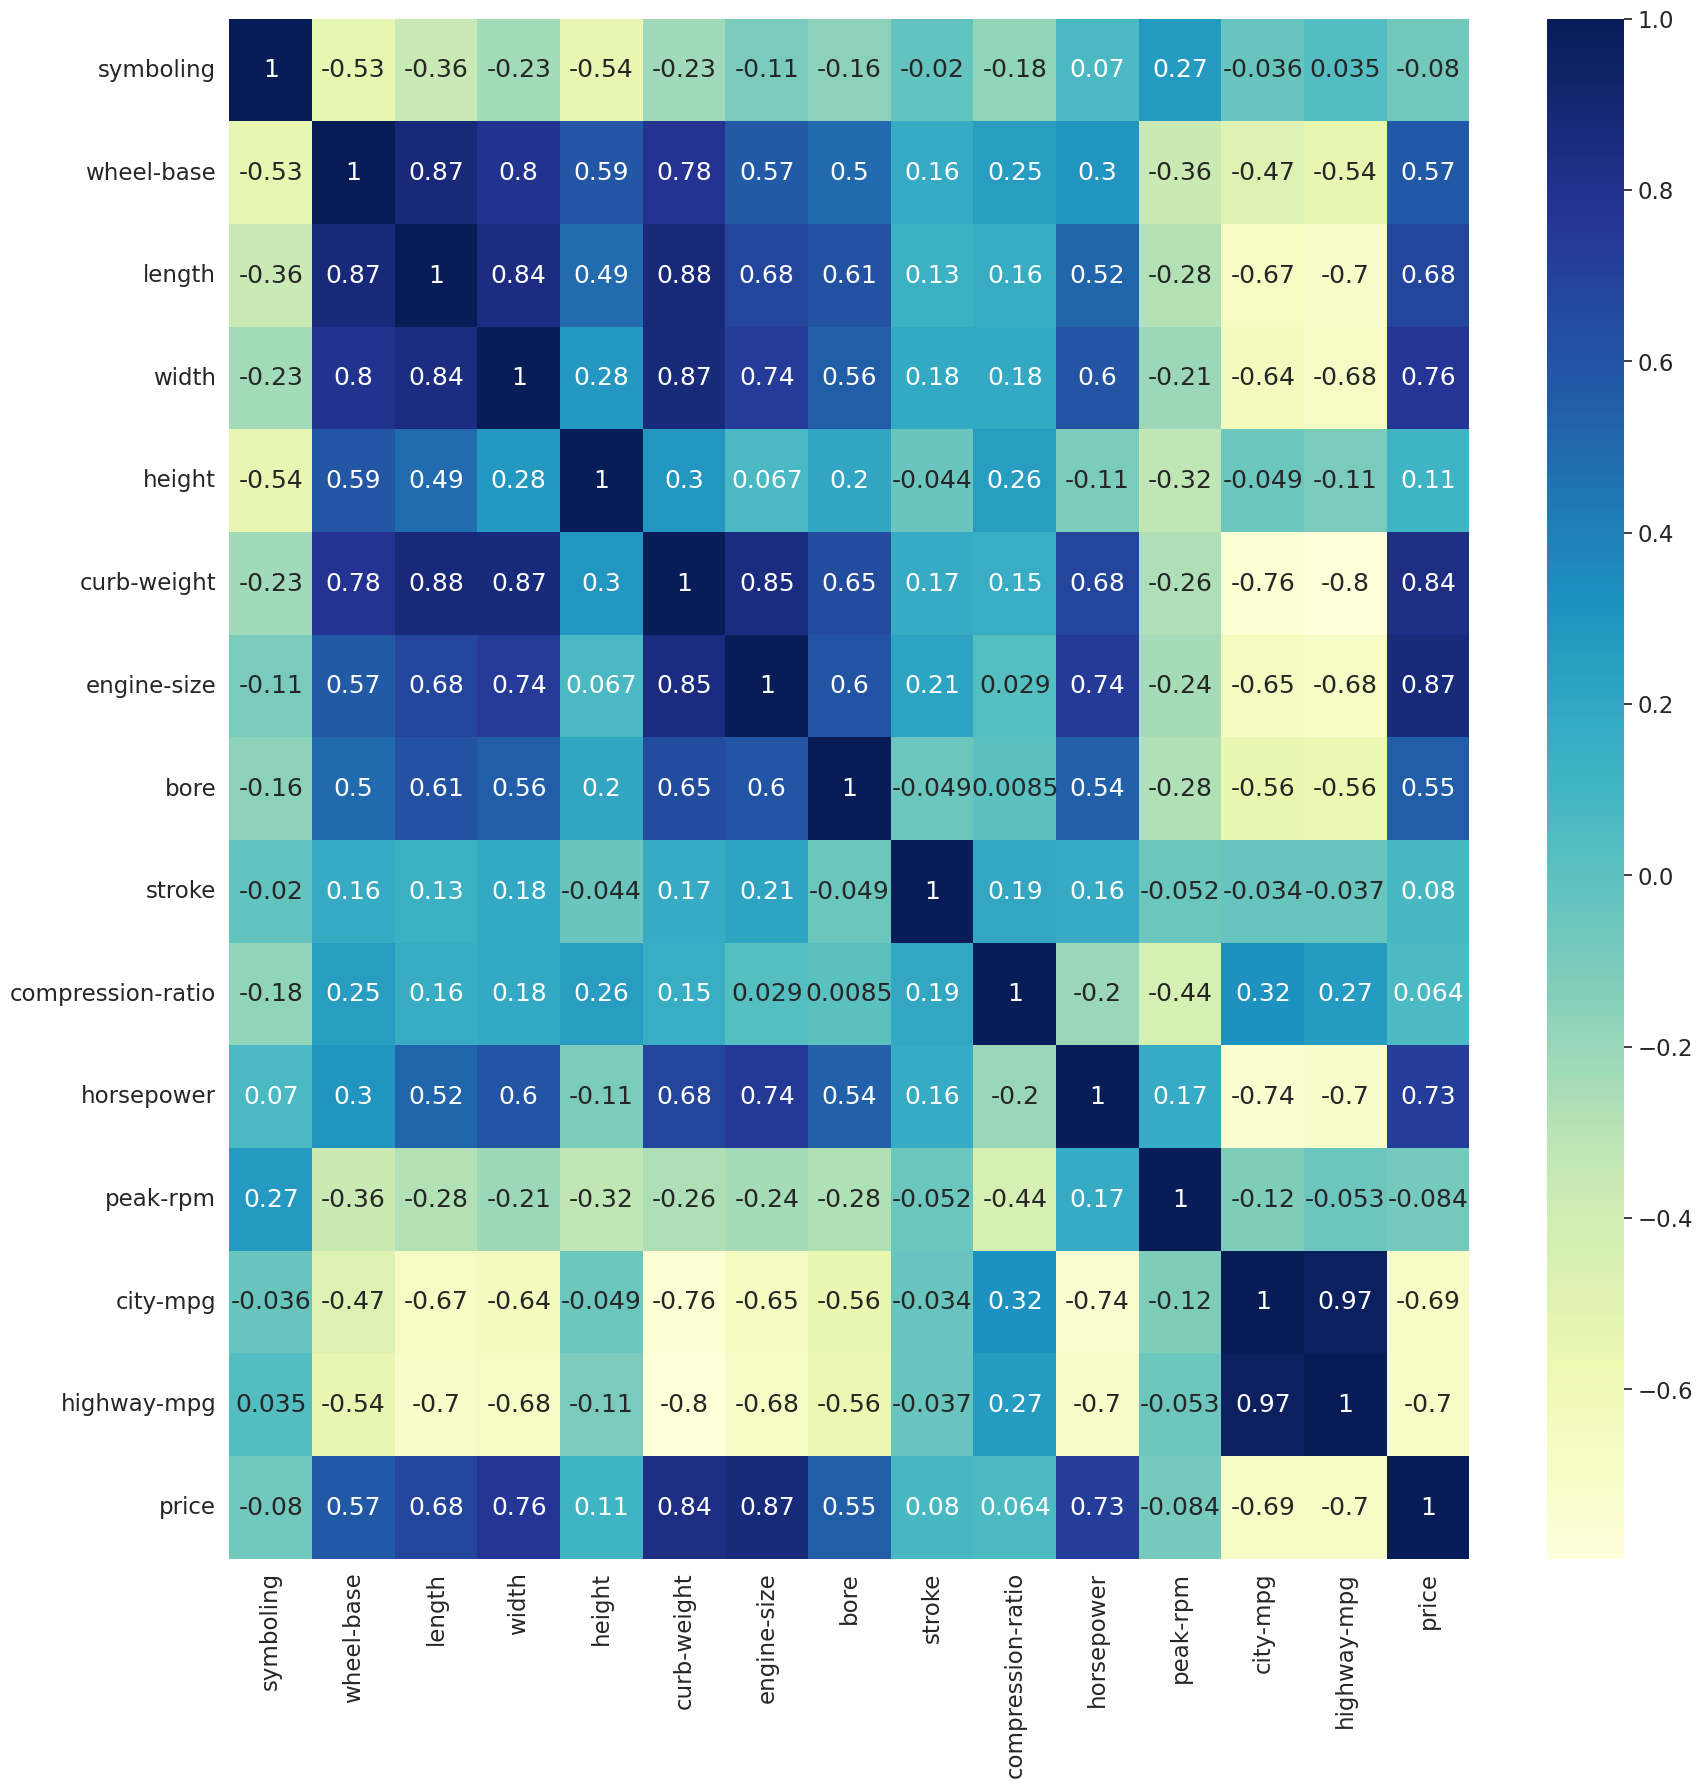

In [209]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [210]:
numeric_features = df.select_dtypes(include=[np.number])
cor = numeric_features.corr()
print(cor['price'].sort_values(ascending = False),'\n')

price                1.000000
engine-size          0.870751
curb-weight          0.835657
width                0.764977
horsepower           0.725481
length               0.678818
wheel-base           0.571784
bore                 0.549438
height               0.112421
stroke               0.079775
compression-ratio    0.064381
symboling           -0.080149
peak-rpm            -0.083675
city-mpg            -0.690580
highway-mpg         -0.698389
Name: price, dtype: float64 



* Price is highly (positively) correlated with `wheelbase`, `length`, `width`, `curb-weight`, `engine-size`, `horsepower`.

* There are many independent variables which are highly correlated: `wheel-base`, `length`, `curb-weight`, `engine-size` etc.. all are positively correlated.

* Price is negatively correlated to `symboling`, `city-mpg` and `highway-mpg`.

categorical features

box

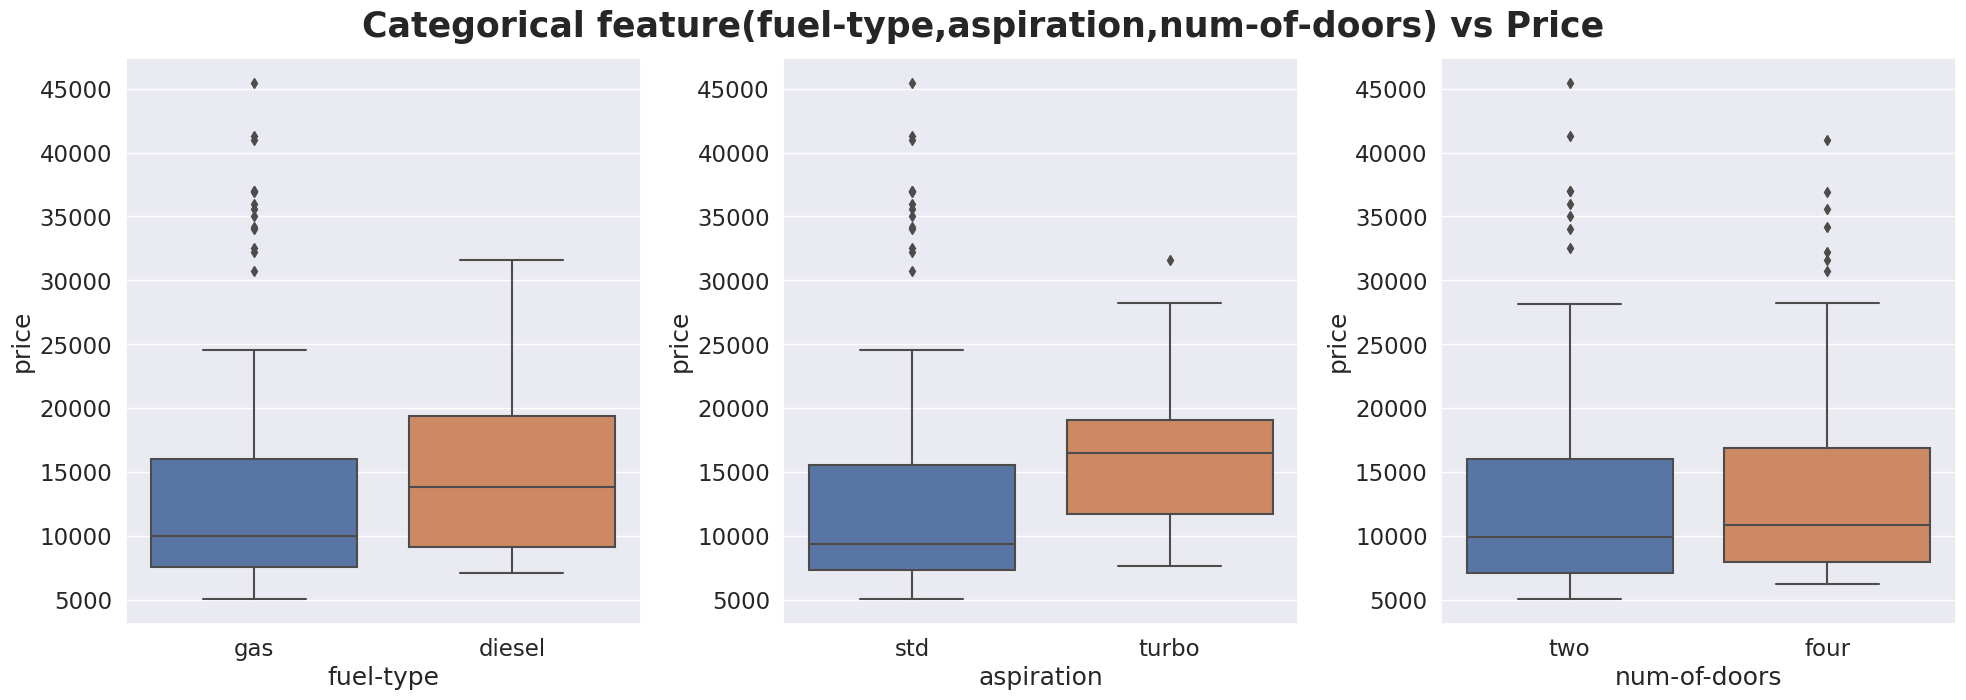

In [211]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.boxplot(x='fuel-type', y='price', data=df)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.boxplot(x='aspiration', y='price', data=df)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.boxplot(x='num-of-doors', y='price', data=df)

plt.suptitle('Categorical feature(fuel-type,aspiration,num-of-doors) vs Price', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


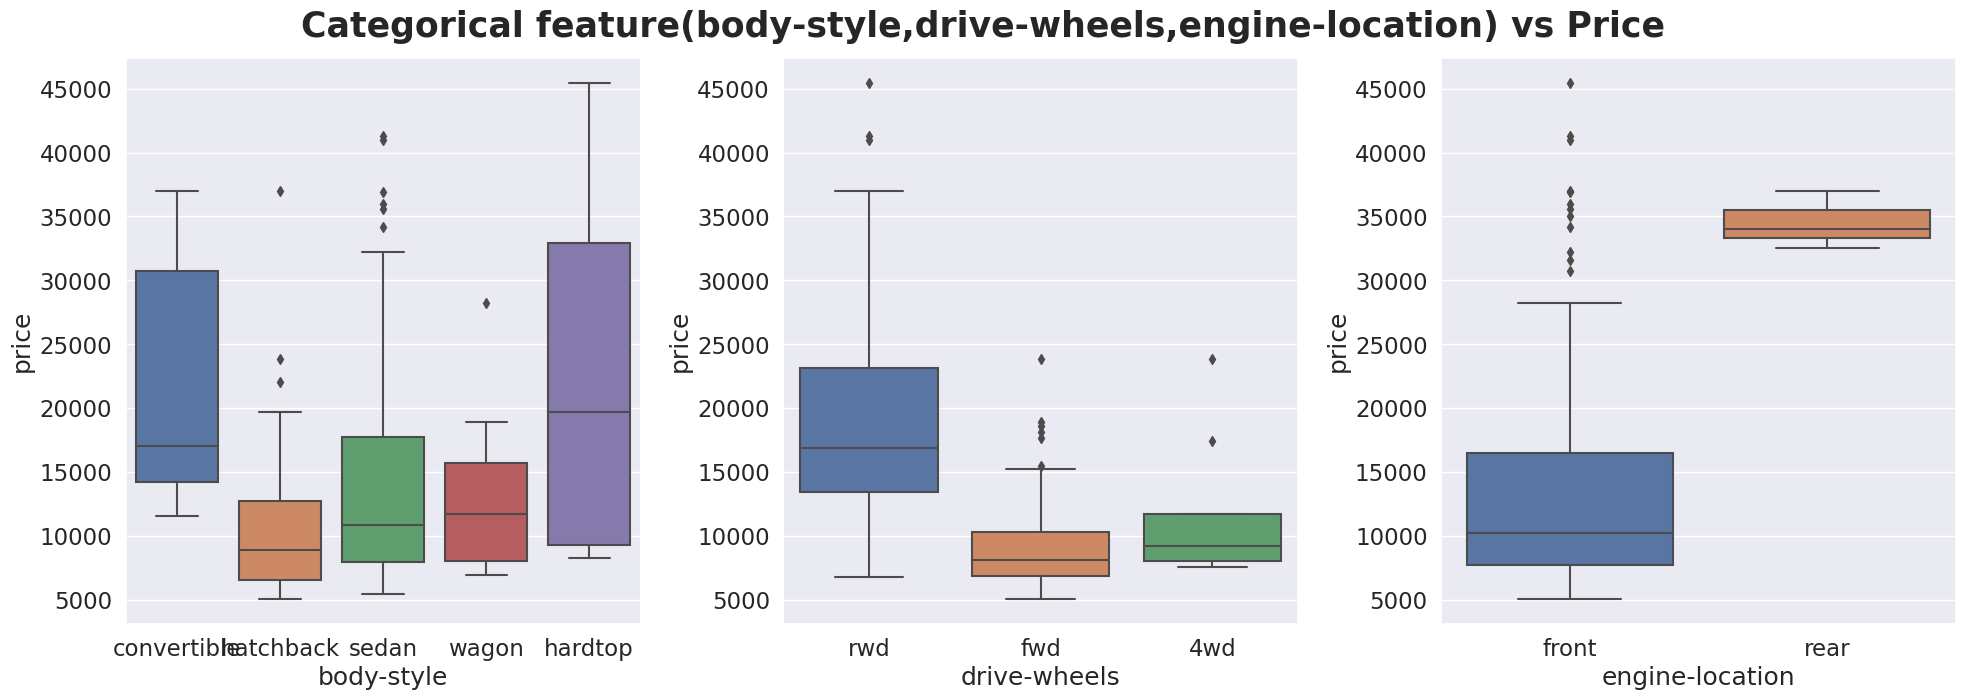

In [212]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.boxplot(x='body-style', y='price', data=df)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.boxplot(x='drive-wheels', y='price', data=df)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.boxplot(x='engine-location', y='price', data=df)

plt.suptitle('Categorical feature(body-style,drive-wheels,engine-location) vs Price', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


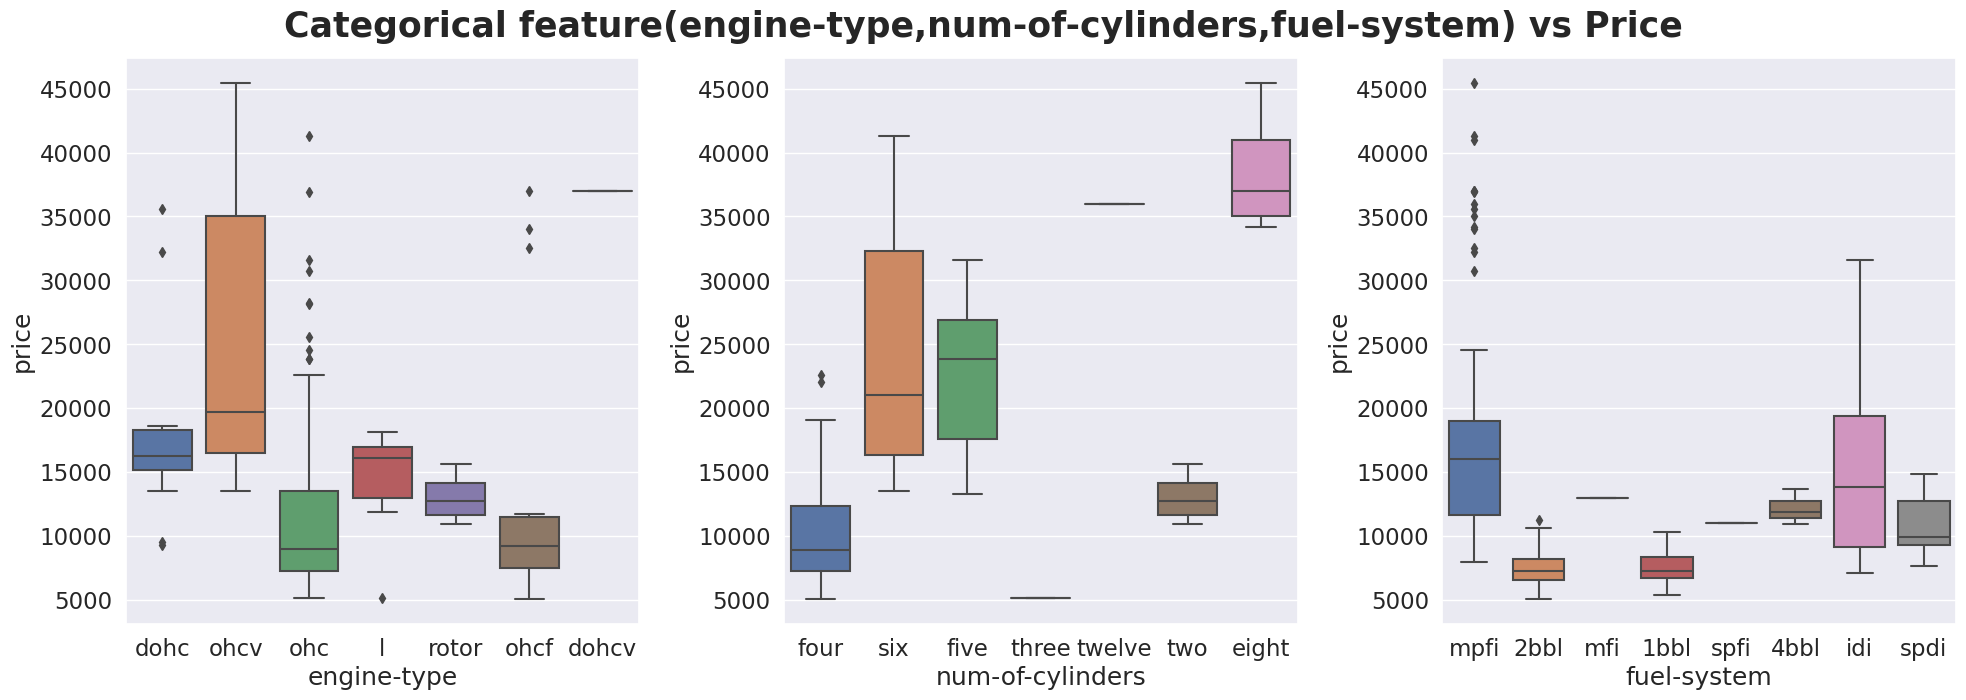

In [213]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.boxplot(x='engine-type', y='price', data=df)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.boxplot(x='num-of-cylinders', y='price', data=df)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.boxplot(x='fuel-system', y='price', data=df)

plt.suptitle('Categorical feature(engine-type,num-of-cylinders,fuel-system) vs Price', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


bar

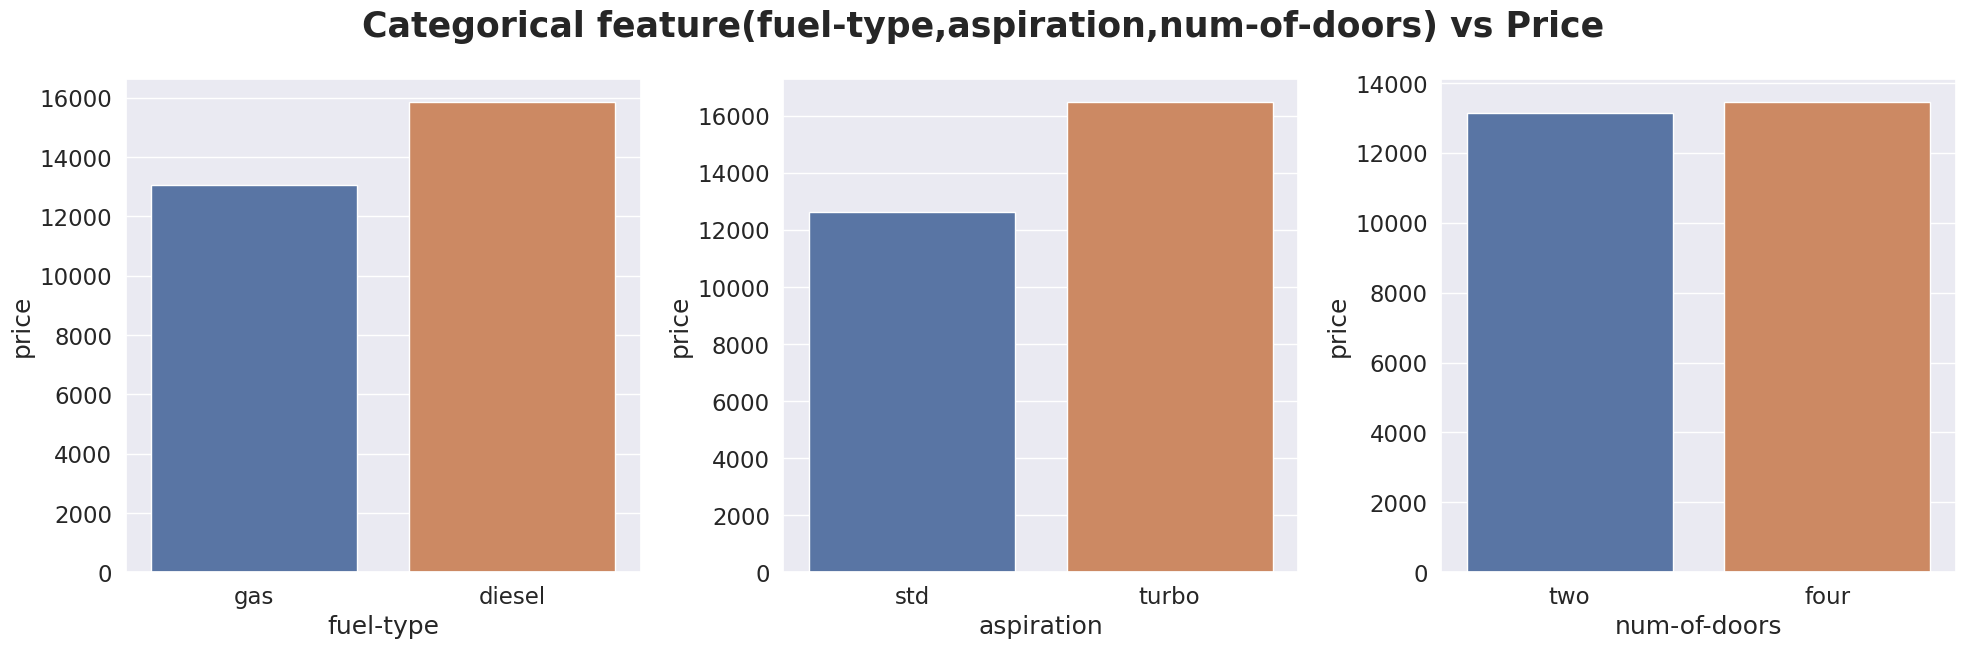

In [214]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.barplot(x='fuel-type', y='price', ci=None, data=df)

plt.subplot(2, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.barplot(x='aspiration', y='price', ci=None, data=df)

plt.subplot(2, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.barplot(x='num-of-doors', y='price', ci=None, data=df)

plt.suptitle('Categorical feature(fuel-type,aspiration,num-of-doors) vs Price', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


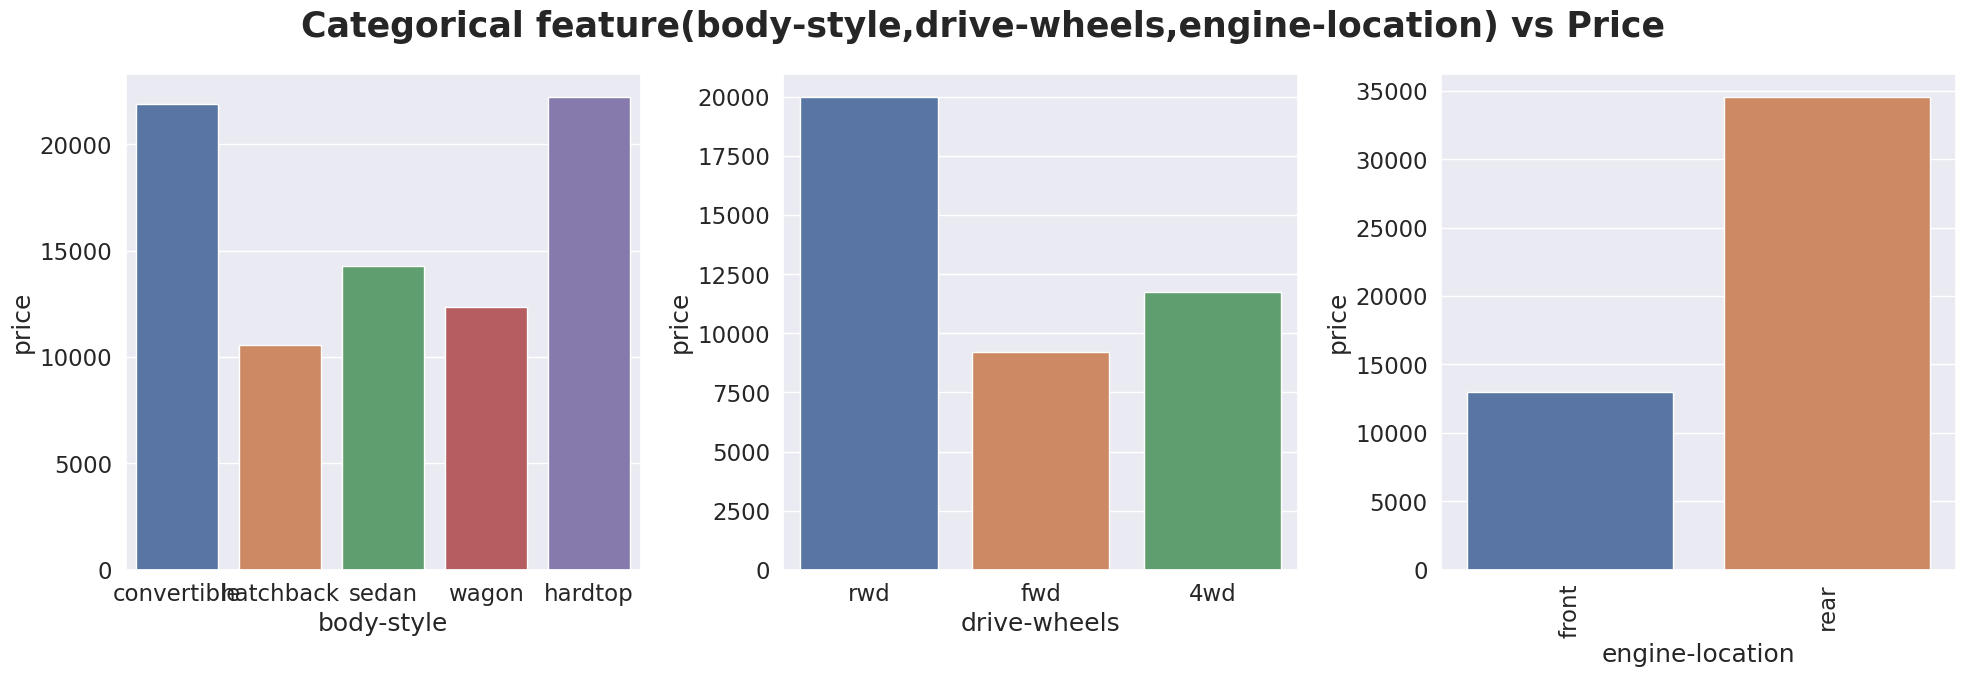

In [215]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.barplot(x='body-style', y='price', ci=None, data=df)

plt.subplot(2, 3, 2)
sns.barplot(x='drive-wheels', y='price', ci=None, data=df)

plt.subplot(2, 3, 3)
sns.barplot(x='engine-location', y='price', ci=None, data=df)

plt.suptitle('Categorical feature(body-style,drive-wheels,engine-location) vs Price', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


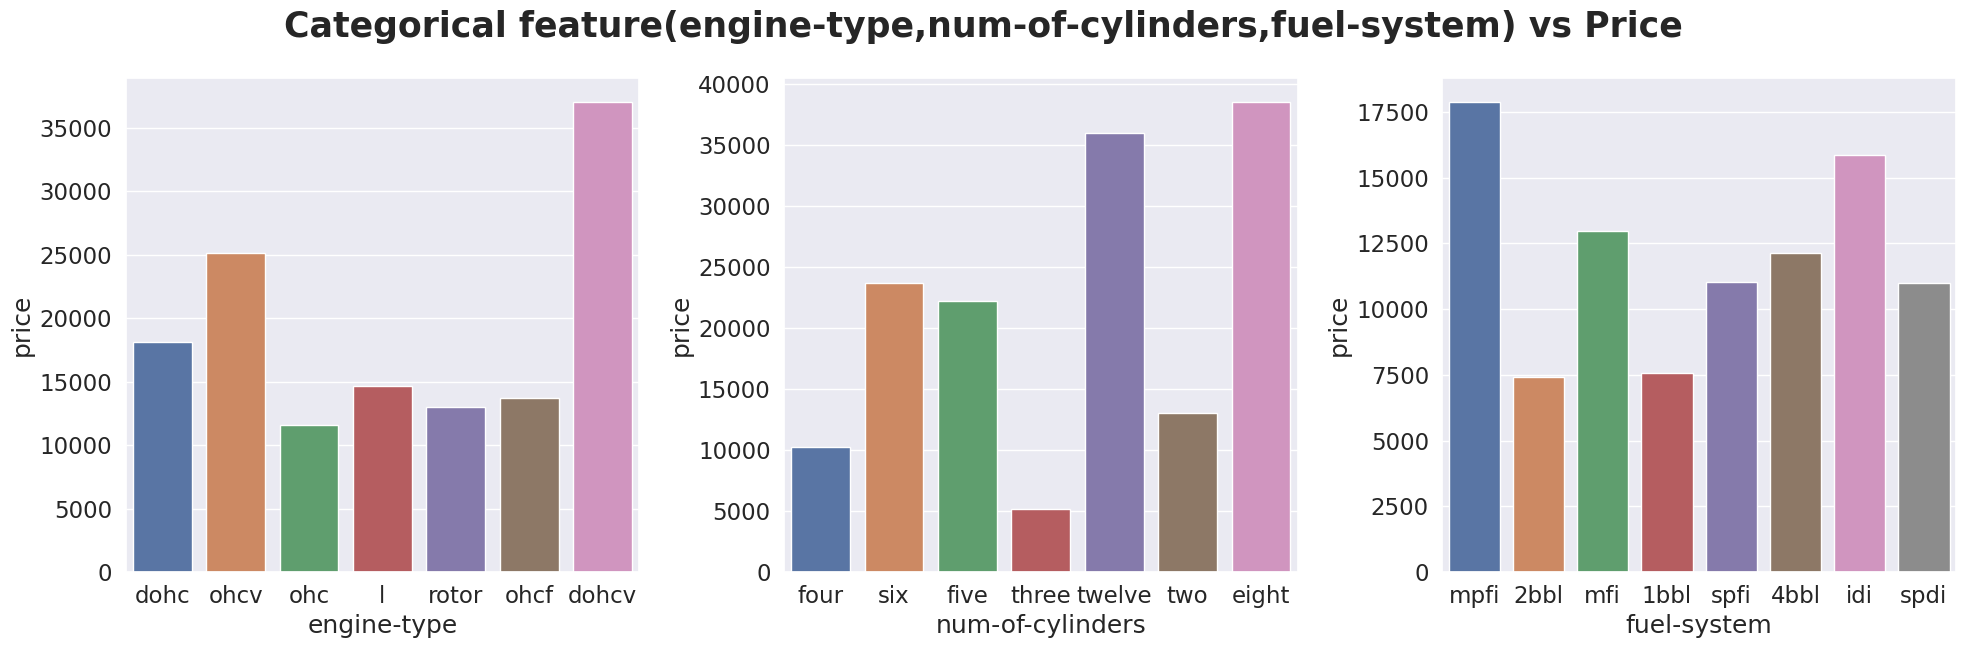

In [216]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.barplot(x='engine-type', y='price', ci=None, data=df)

plt.subplot(2, 3, 2)
sns.barplot(x='num-of-cylinders', y='price', ci=None, data=df)

plt.subplot(2, 3, 3)
sns.barplot(x='fuel-system', y='price', ci=None, data=df)

plt.suptitle('Categorical feature(engine-type,num-of-cylinders,fuel-system) vs Price', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


* Diesel cars are priced more than gas cars
* Cars with turbo aspiration engine are priced more than standard ones.
* Number of doors doesn't seem to have much effect on price.
* Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.
* Cars with Rear wheel drive have a higher price value.
* DOHCV and OHCV engine types are priced high.
* Eight and twelve cylinder cars have higher price.
* IDI and MPFI fuel system have higher price.
* When increasing cylinder number the price increasing
* When incresing engine size the price will incresing.